# Macro research topic 1
## Quantifying geopolitical uncertainty that isn’t yet reflected in the markets


### Introduction

-  The world is currently experiencing more conflicts than at any time since the post-9/11 Iraq war.
-  I believe the risk of nuclear war is at its highest level since the Cold War.
-  Despite these risks, the S&P 500 keeps reaching new highs, driven by the ChatGPT initiated tech boom.
-  Markets seem aware of war risks, as shown by Bitcoin's quick drop when Iran attacked Israel with war drones. S&P 500 did not reflect this drop as it was a Sunday.
-  This leads me to believe that that markets believe AI's economic benefits outweigh the potential negative impacts of war.
-  This study aims to:
  1. Measure the positive effects of AI and negative effects of war on the economy
  2. Analyze how these 2 factors are currently priced into markets
  3. Compare the current situations with the 2000 tech boom and Cold War era to identify possible future scenarios.

### DOWNLOAD DATA

In [1]:
import pandas as pd
from yahooquery import Ticker
from fredapi import Fred
import os
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Initialize Yahoo Finance and FRED tickers
yahoo_tickers = {
    # Equity Indices
    "^DJI": "Dow Jones Industrial Average",
    "^GSPC": "S&P 500",
    "^N225": "Nikkei 225",
    "^FTSE": "FTSE 100",
    "^HSI": "Hang Seng Index",
    "^BSESN": "BSE Sensex",
    "^MXX": "IPC Mexico",
    "^BVSP": "Bovespa Index",
    "^RTS": "RTS Index",

    # Commodities
    "CL=F": "WTI Crude Oil",
    "BZ=F": "Brent Crude Oil",
    "GC=F": "Gold Futures",
    "SI=F": "Silver Futures",
    "ZS=F": "Soybean Futures",
    "ZW=F": "Wheat Futures",
    "HG=F": "Copper Futures",

    # Currencies
    "EURUSD=X": "Euro/US Dollar",
    "USDJPY=X": "US Dollar/Japanese Yen",
    "USDMXN=X": "US Dollar/Mexican Peso",
    "USDZAR=X": "US Dollar/South African Rand",

    # Fixed Income
    "^TNX": "10-Year Treasury Yield",
    "^TYX": "30-Year Treasury Yield",
    "^FVX": "5-Year Treasury Yield",
    "^IRX": "13-Week Treasury Bill Yield",

    # Corporate Bonds
    "LQD": "Investment Grade Corporate Bond ETF",
    "HYG": "High Yield Corporate Bond ETF",

    # Volatility
    "^VIX": "CBOE Volatility Index",

    # Cryptocurrencies
    "BTC-USD": "Bitcoin (BTC)",
}

fred_series = {
    # Growth and Employment
    'GDP': 'Gross Domestic Product',
    'UNRATE': 'Unemployment Rate',
    'INDPRO': 'Industrial Production',
    'PAYEMS': 'Nonfarm Payrolls',
    'CIVPART': 'Labor Force Participation Rate',

    # Inflation and Prices
    'CPIAUCSL': 'Consumer Price Index',
    'PPIACO': 'Producer Price Index',
    'PCEPILFE': 'Core PCE Price Index',

    # Trade and Globalization
    'BOPGSTB': 'Trade Balance',
    'DTWEXBGS': 'US Dollar Index',

    # Financial Conditions
    'FEDFUNDS': 'Federal Funds Rate',
    'T10Y2Y': '10-Year Treasury Minus 2-Year Treasury Spread',
    'BAA10Y': 'Moody’s BAA Corporate Bond Yield Spread',
    'STLFSI': 'St. Louis Fed Financial Stress Index'
}

# Initialize data containers
yahoo_data = {}
fred_data = {}

# Fetch data from Yahoo Finance
for ticker, name in yahoo_tickers.items():
    try:
        data = Ticker(ticker)
        history = data.history(period="max")
        if not history.empty:  # Ensure data exists for the ticker
            history['Ticker'] = ticker
            history['Name'] = name
            yahoo_data[ticker] = history
            print(f"Fetched data for {name} ({ticker})")
        else:
            print(f"No data for {name} ({ticker})")
            
    except Exception as e:
        print(f"Error fetching data for {name} ({ticker}): {e}")

# Fetch data from FRED API (ensure you replace the API key with your own)
fred_api_key = os.getenv('FRED_API_KEY')  # Replace with your FRED API key or set it as an environment variable
fred = Fred(api_key=fred_api_key)

for series_id, series_name in fred_series.items():
    try:
        series_data = fred.get_series(series_id)
        if series_data is not None and not series_data.empty:  # Ensure data exists for the series
            series_df = pd.DataFrame(series_data, columns=['Value'])
            series_df['Ticker'] = series_id
            series_df['Name'] = series_name
            fred_data[series_id] = series_df
            print(f"Fetched data for {series_name} ({series_id})")
        else:
            print(f"No data for {series_name} ({series_id})")
            
    except Exception as e:
        print(f"Error fetching data for {series_name} ({series_id}): {e}")

Fetched data for Dow Jones Industrial Average (^DJI)
Fetched data for S&P 500 (^GSPC)
Fetched data for Nikkei 225 (^N225)
Fetched data for FTSE 100 (^FTSE)
Fetched data for Hang Seng Index (^HSI)
Fetched data for BSE Sensex (^BSESN)
Fetched data for IPC Mexico (^MXX)
Fetched data for Bovespa Index (^BVSP)
Fetched data for RTS Index (^RTS)
Fetched data for WTI Crude Oil (CL=F)
Fetched data for Brent Crude Oil (BZ=F)
Fetched data for Gold Futures (GC=F)
Fetched data for Silver Futures (SI=F)
Fetched data for Soybean Futures (ZS=F)
Fetched data for Wheat Futures (ZW=F)
Fetched data for Copper Futures (HG=F)
Fetched data for Euro/US Dollar (EURUSD=X)
Fetched data for US Dollar/Japanese Yen (USDJPY=X)
Fetched data for US Dollar/Mexican Peso (USDMXN=X)
Fetched data for US Dollar/South African Rand (USDZAR=X)
Fetched data for 10-Year Treasury Yield (^TNX)
Fetched data for 30-Year Treasury Yield (^TYX)
Fetched data for 5-Year Treasury Yield (^FVX)
Fetched data for 13-Week Treasury Bill Yield (

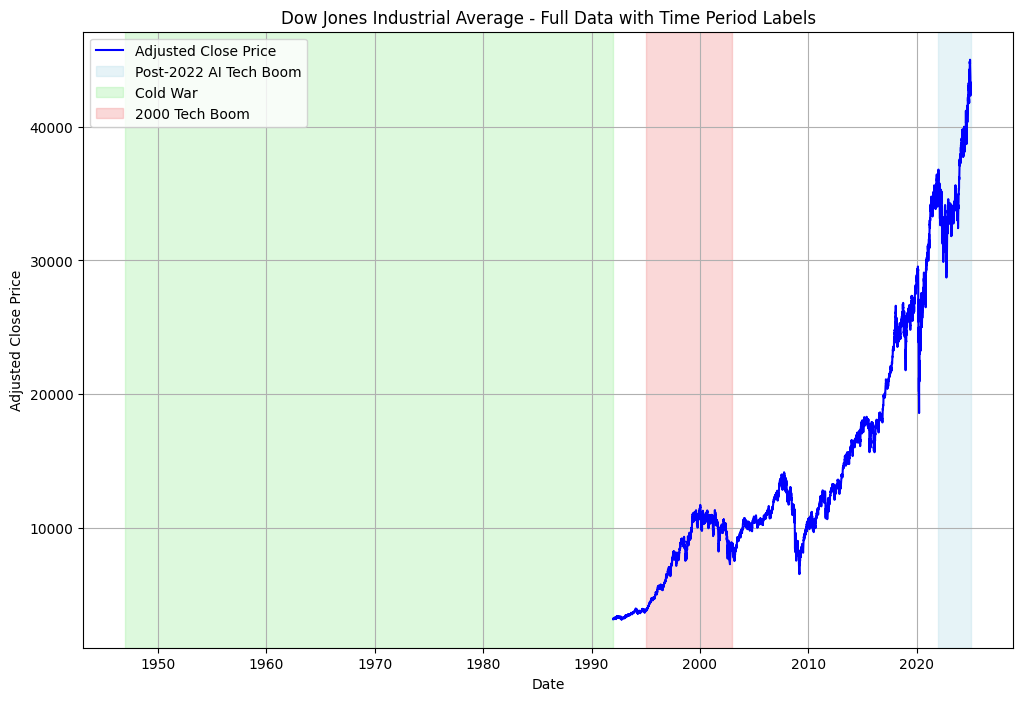

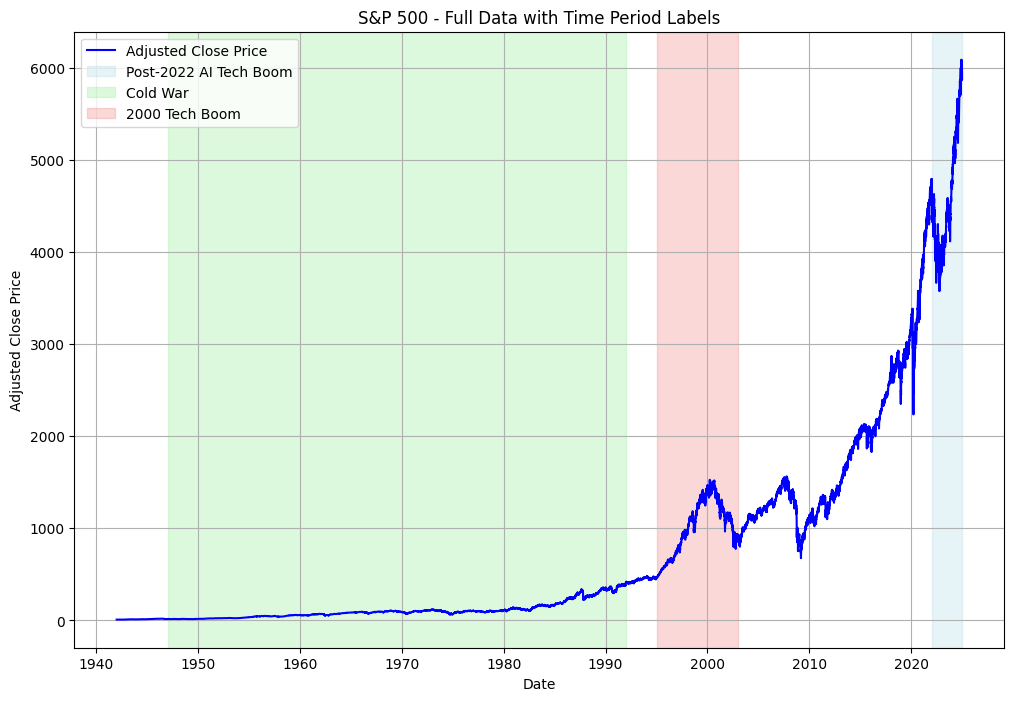

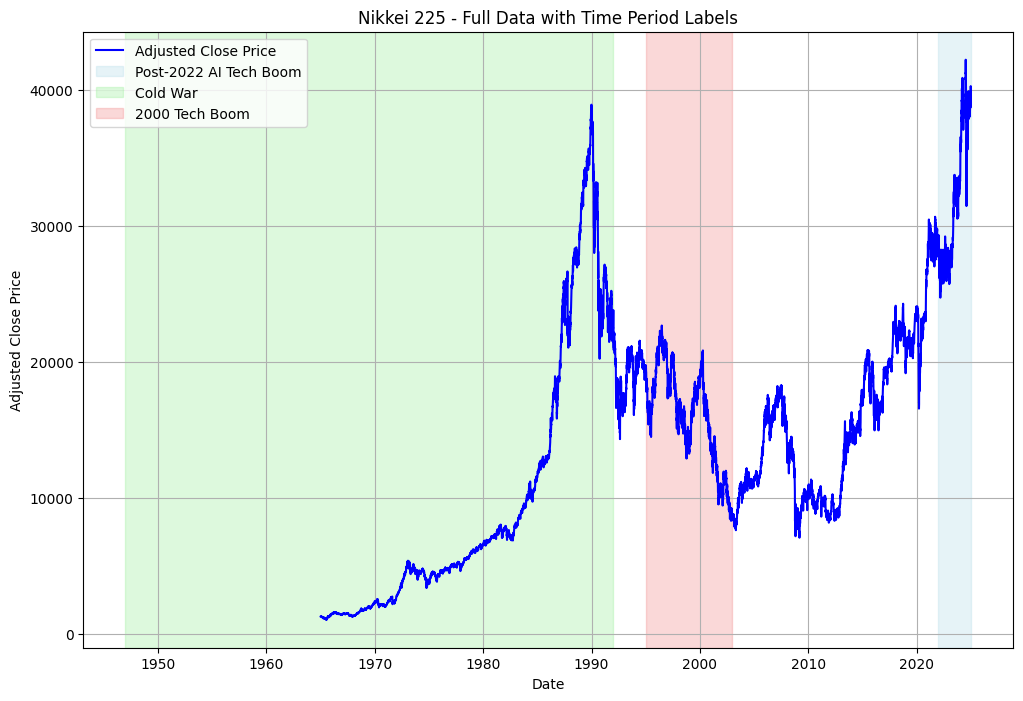

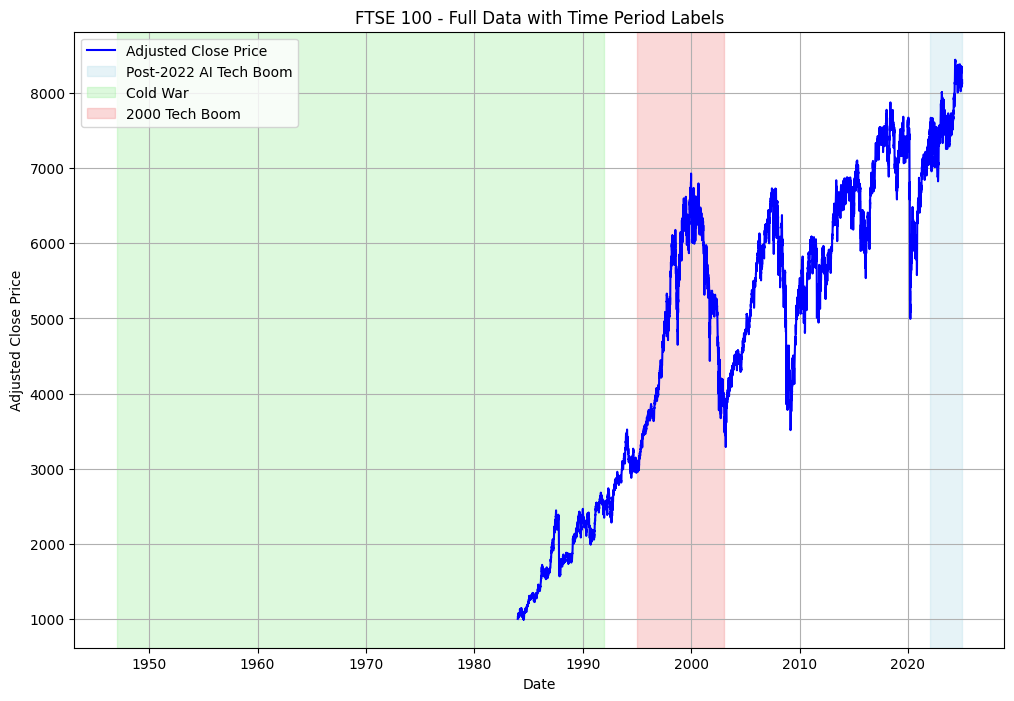

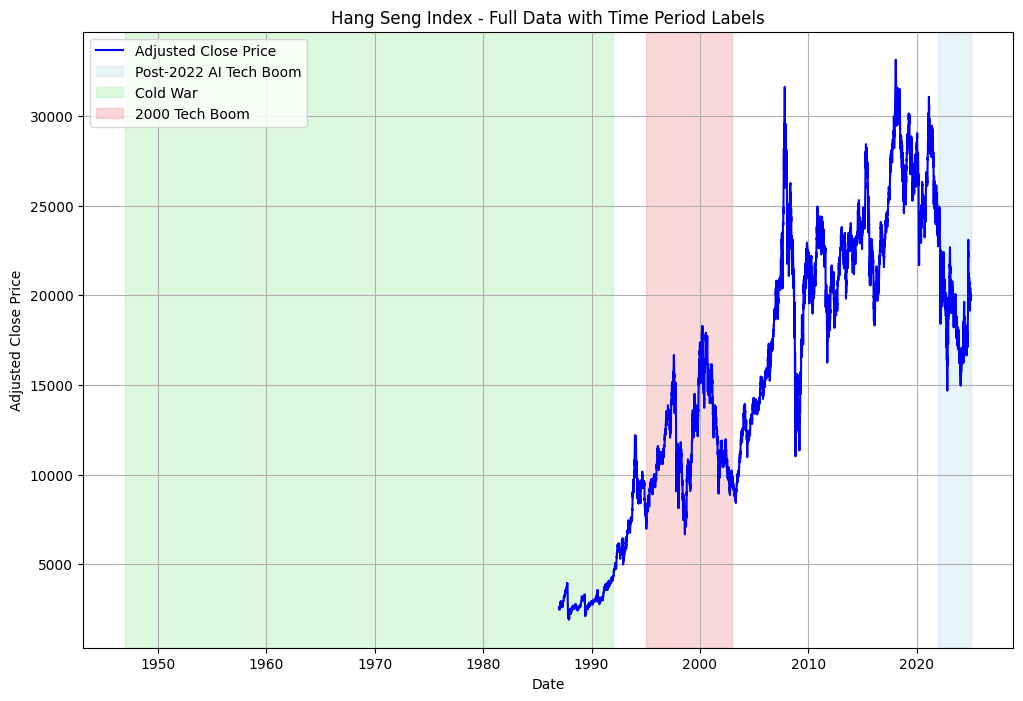

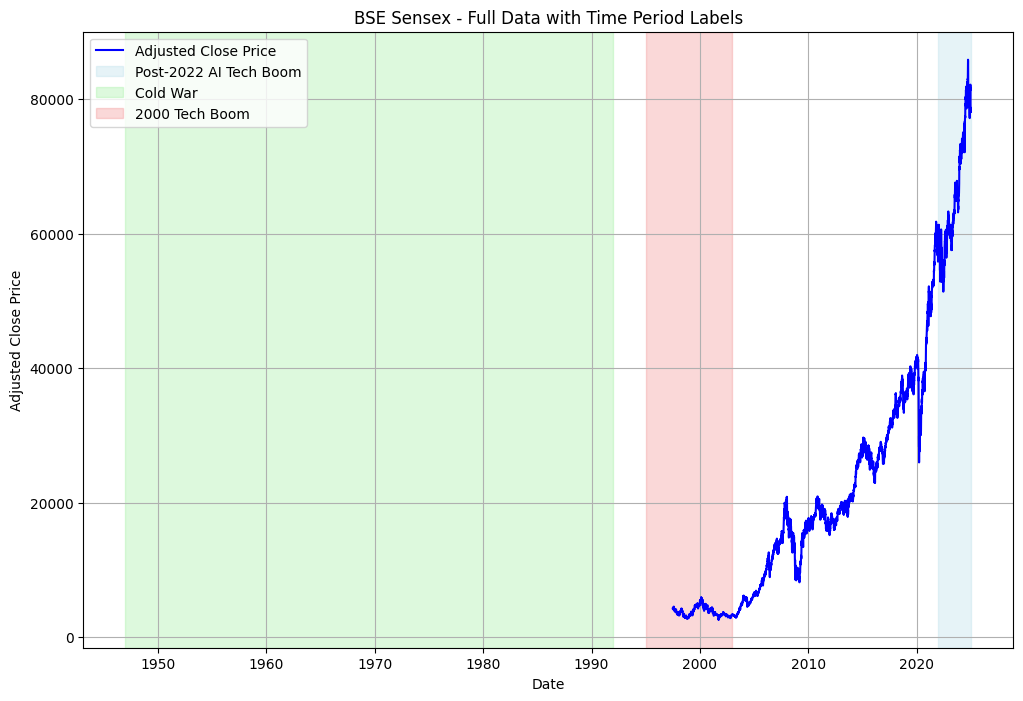

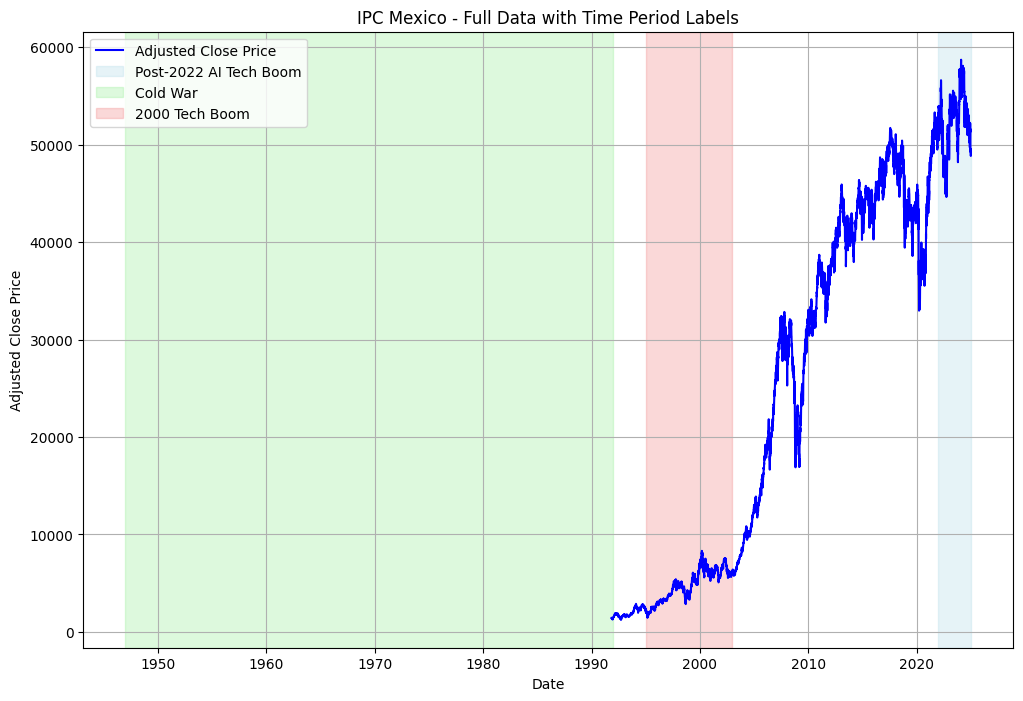

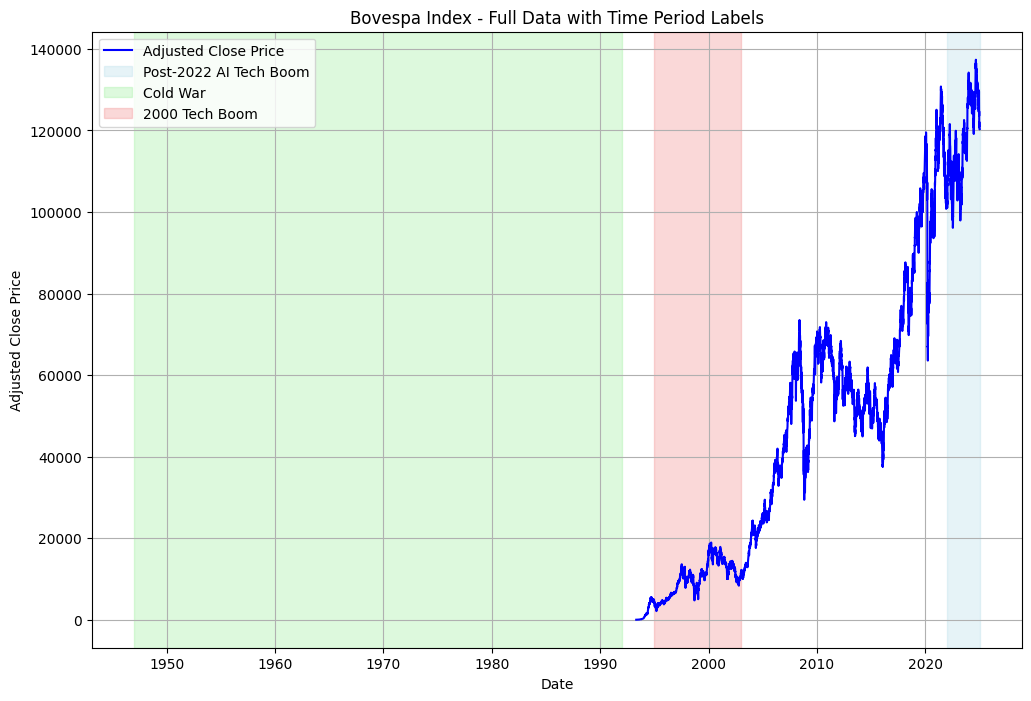

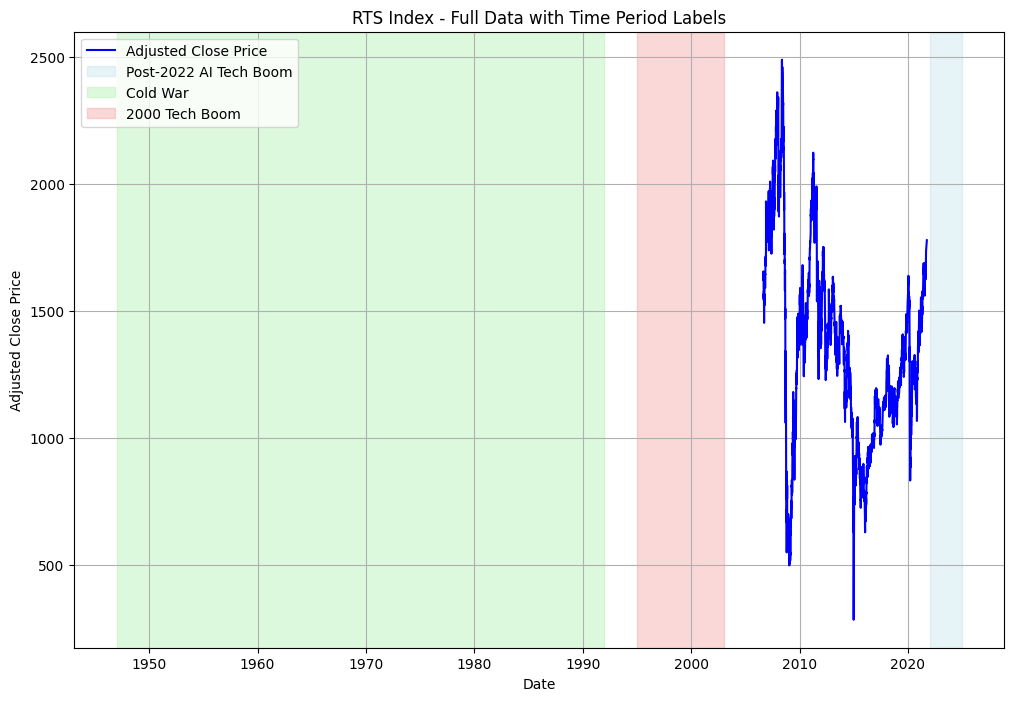

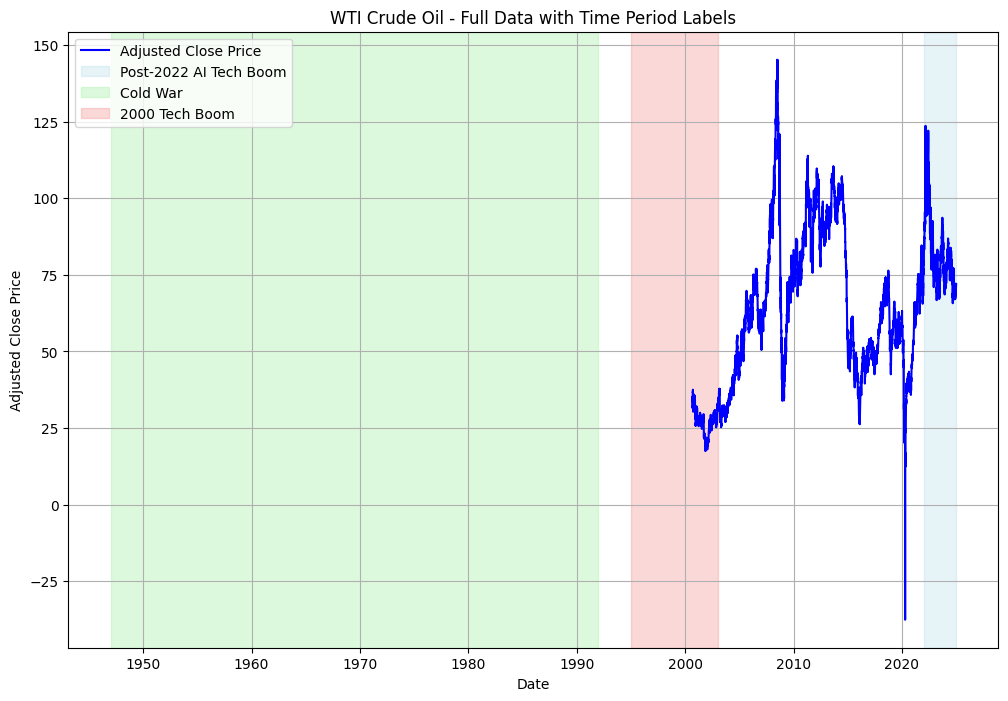

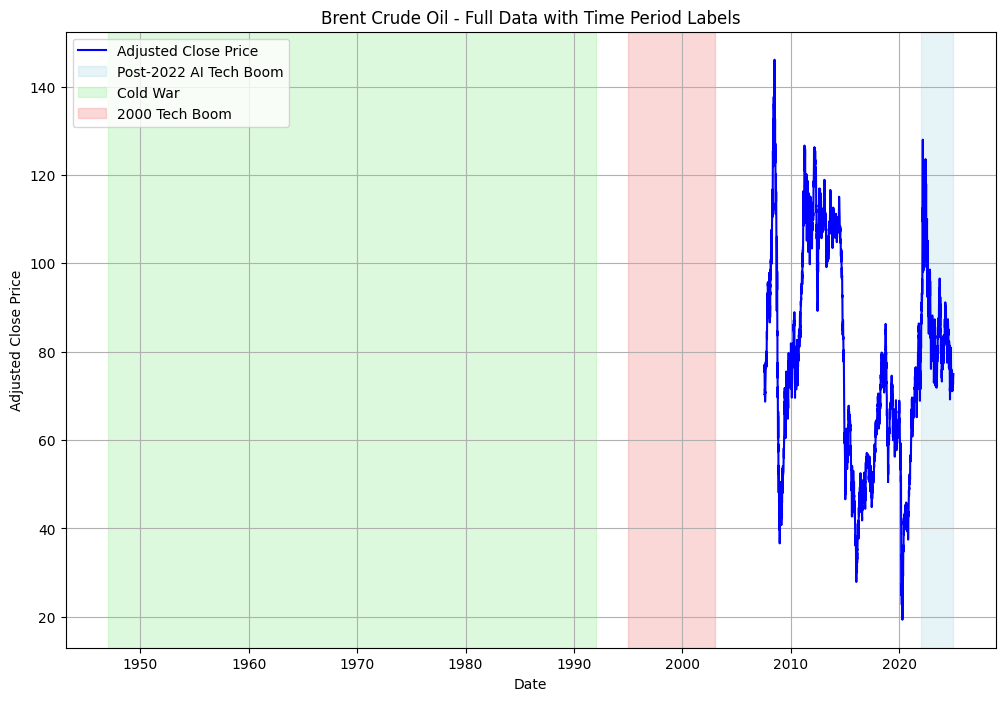

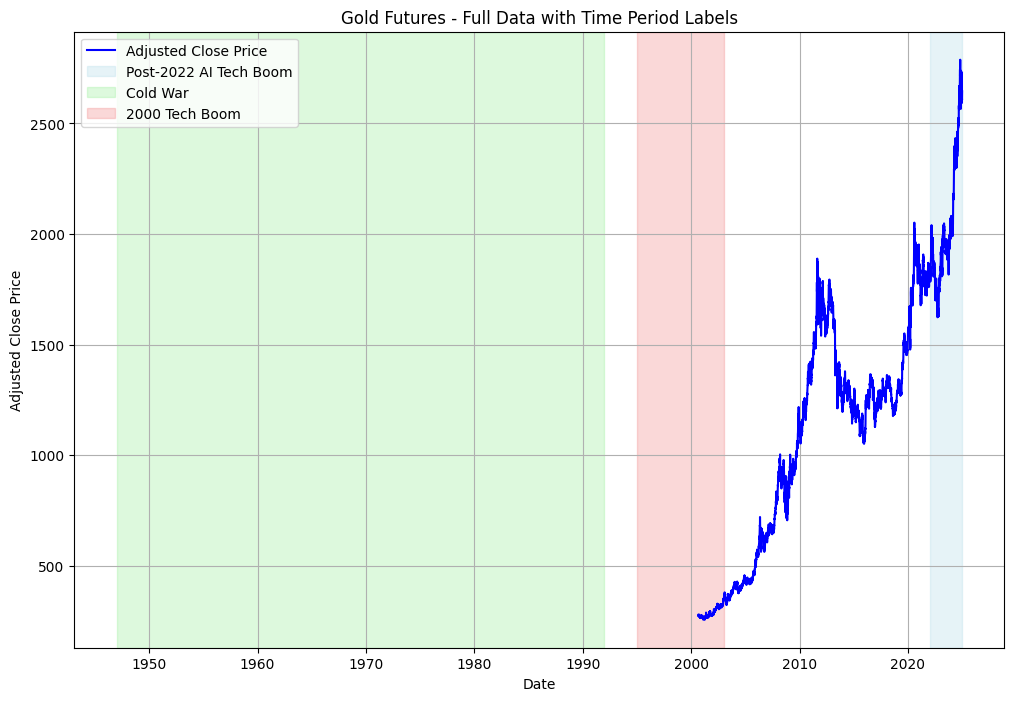

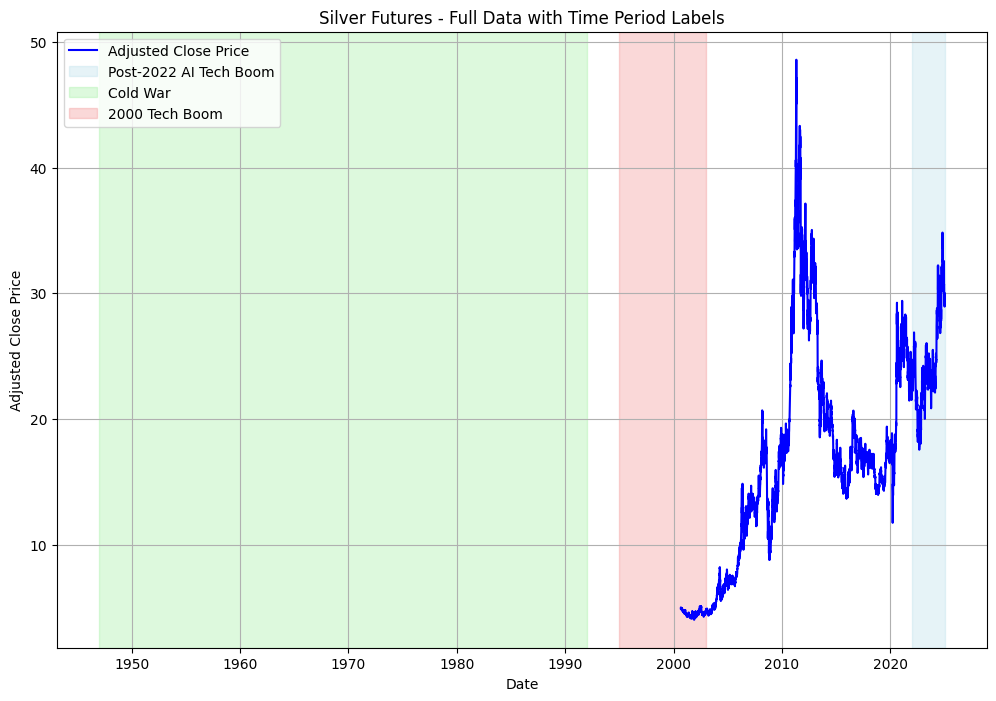

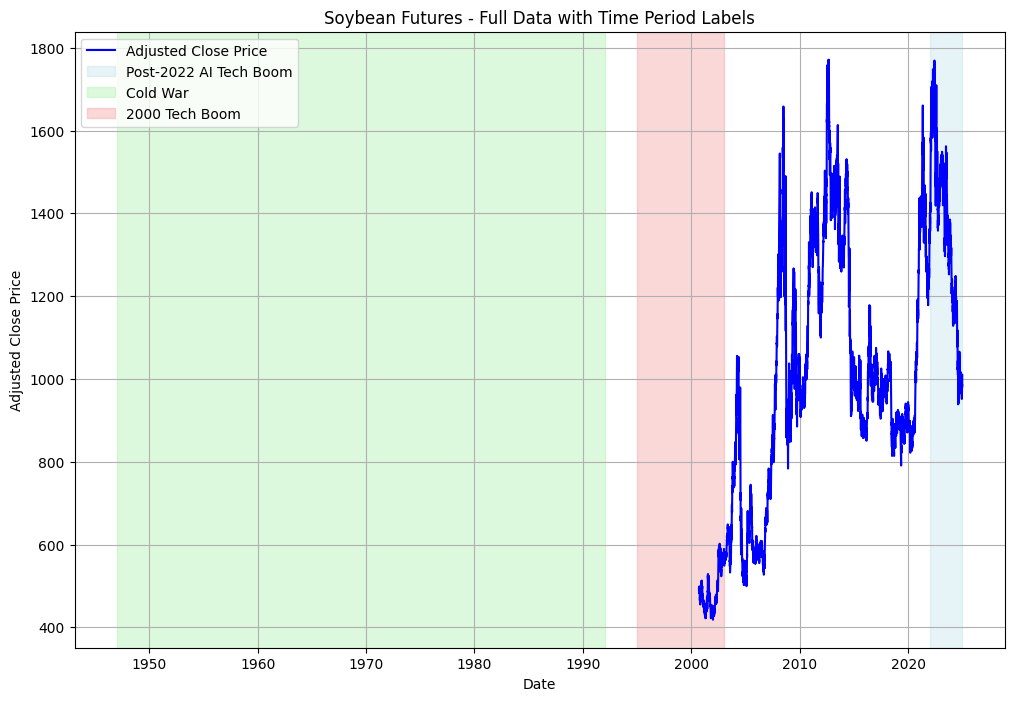

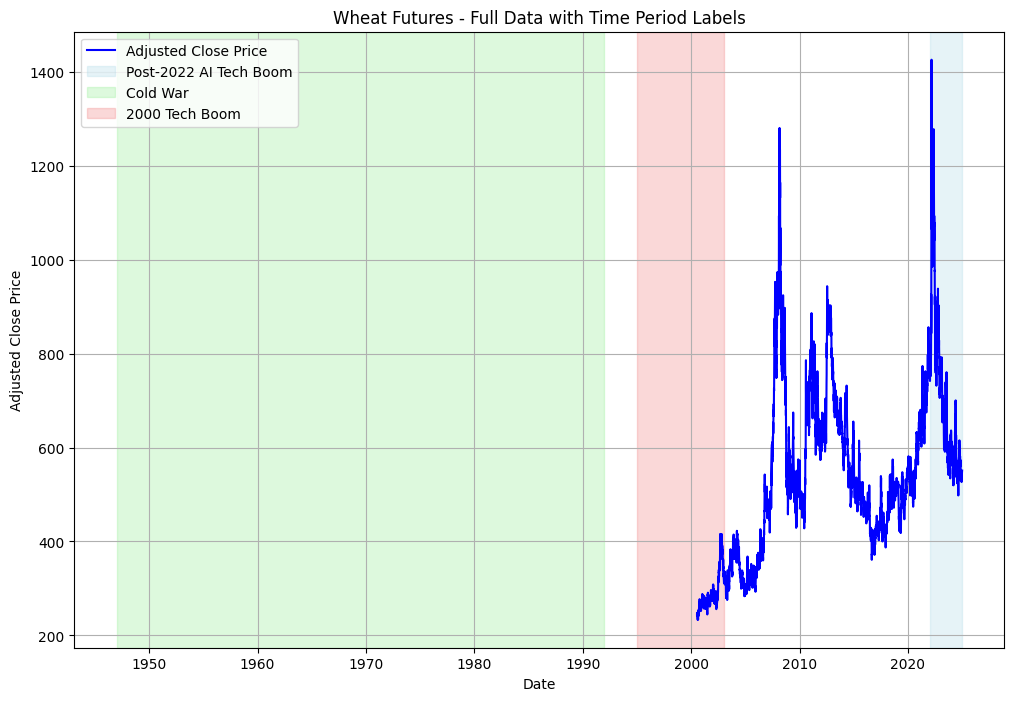

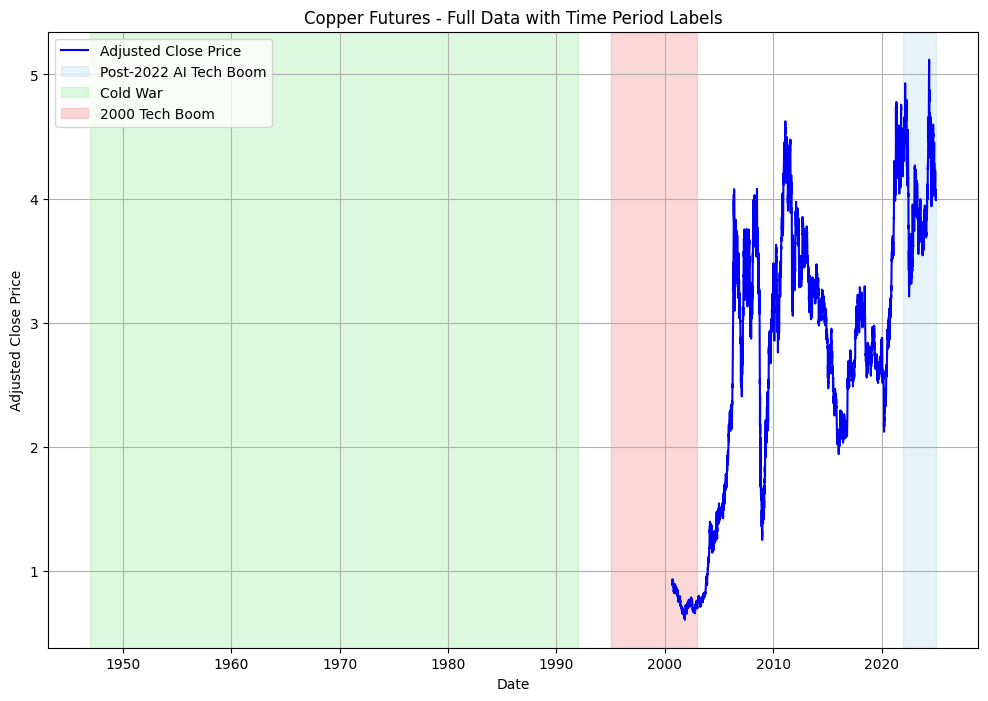

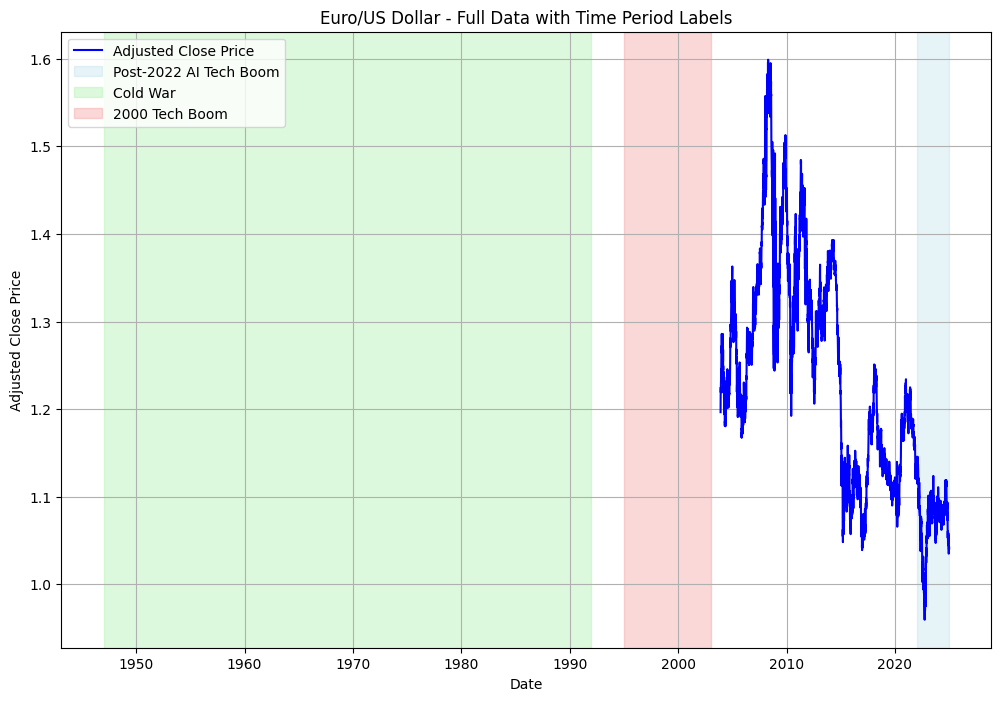

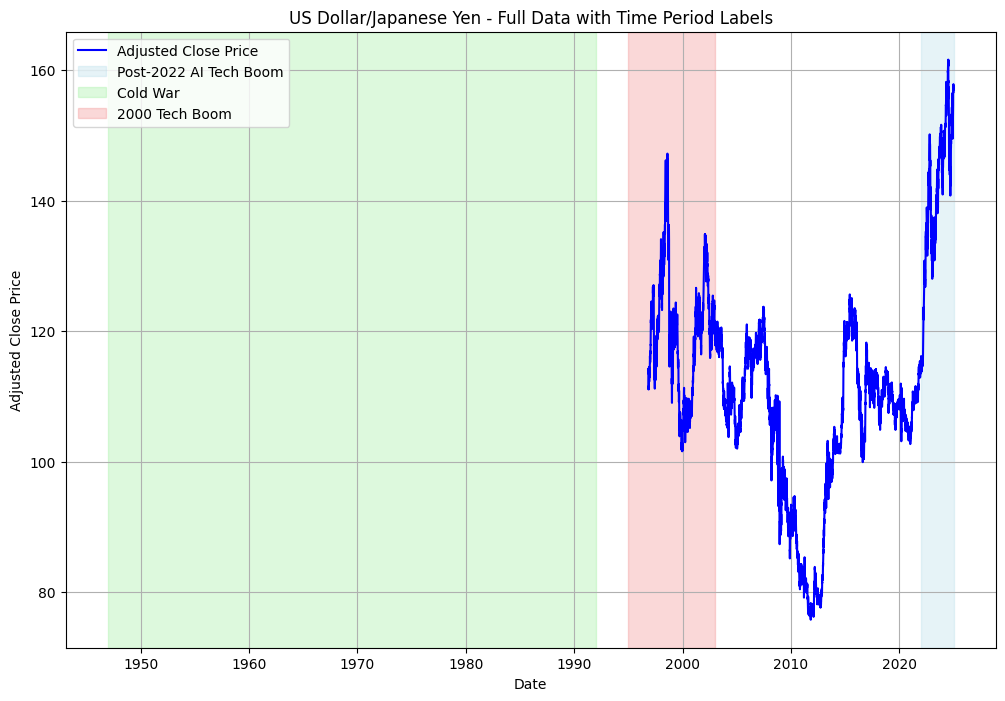

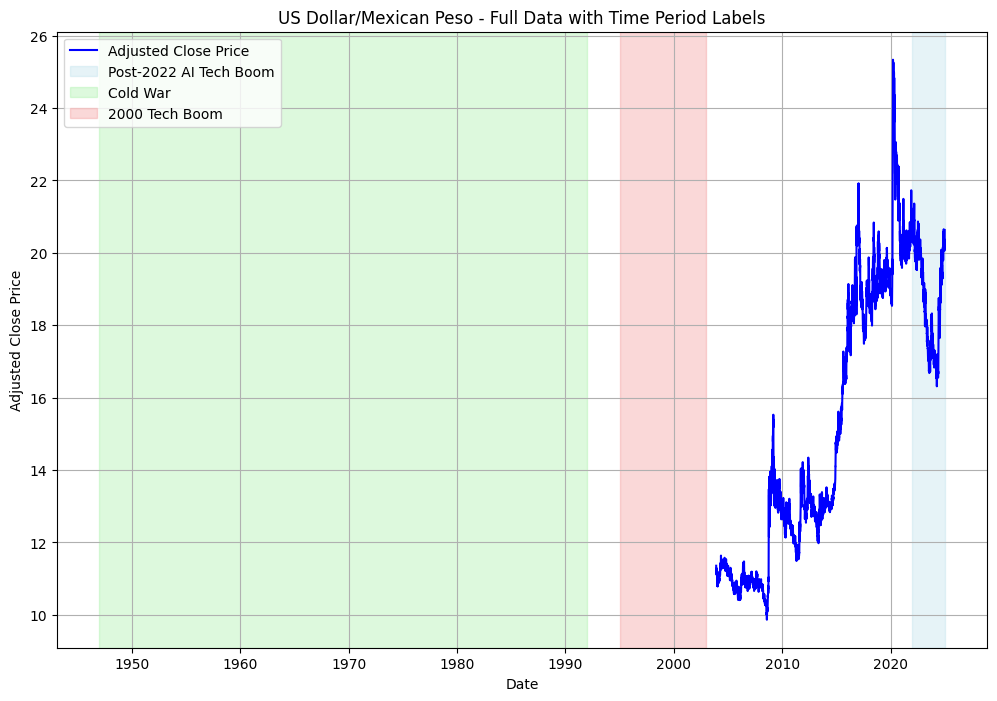

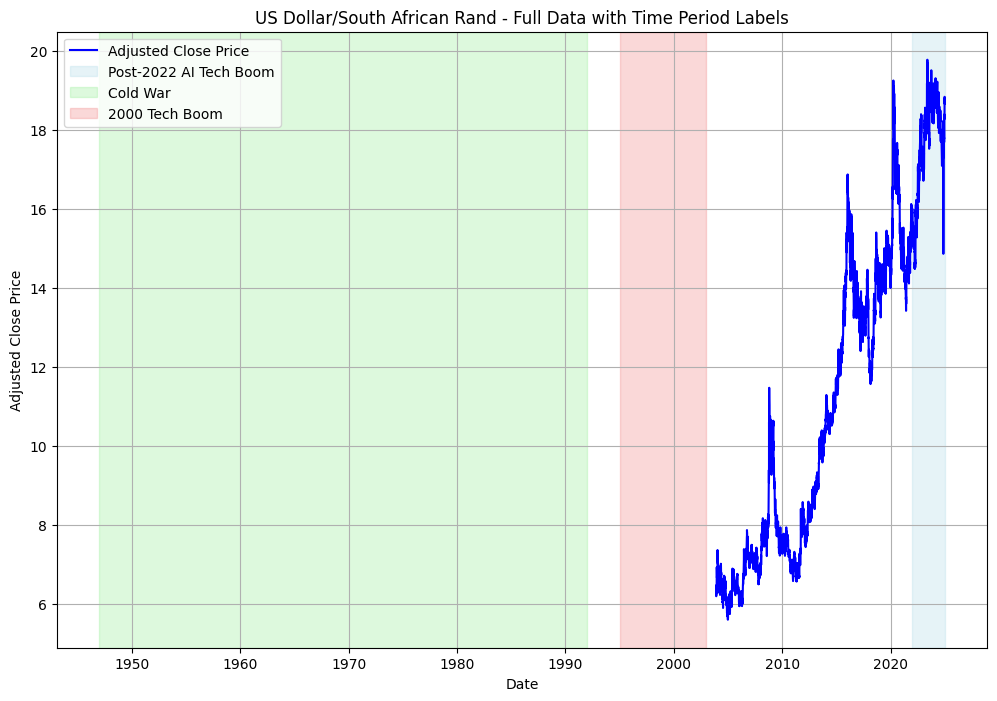

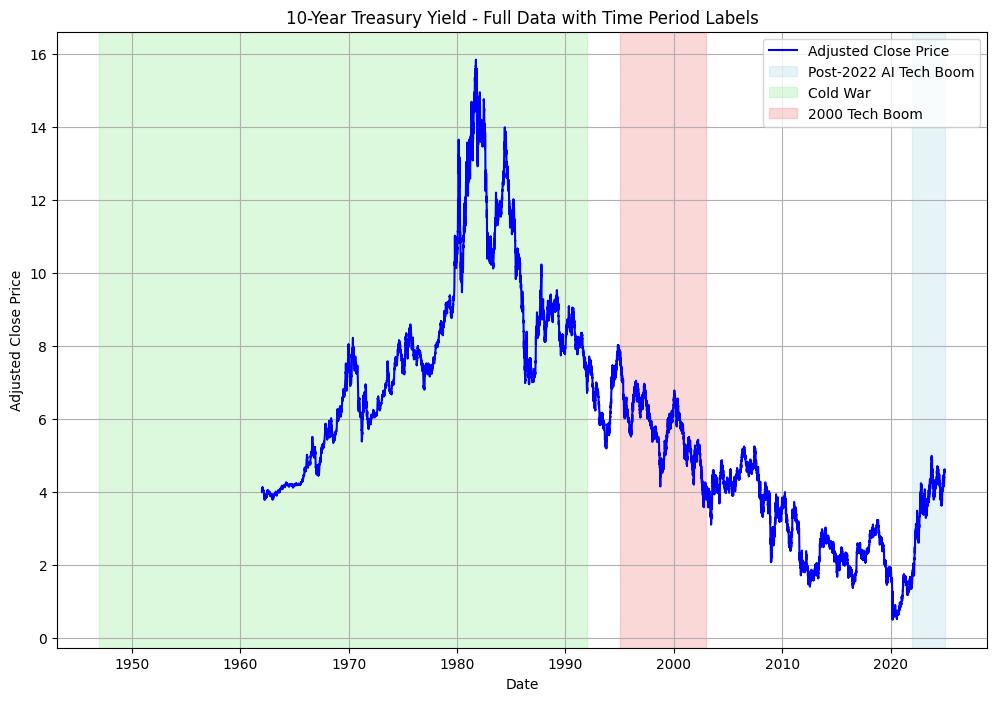

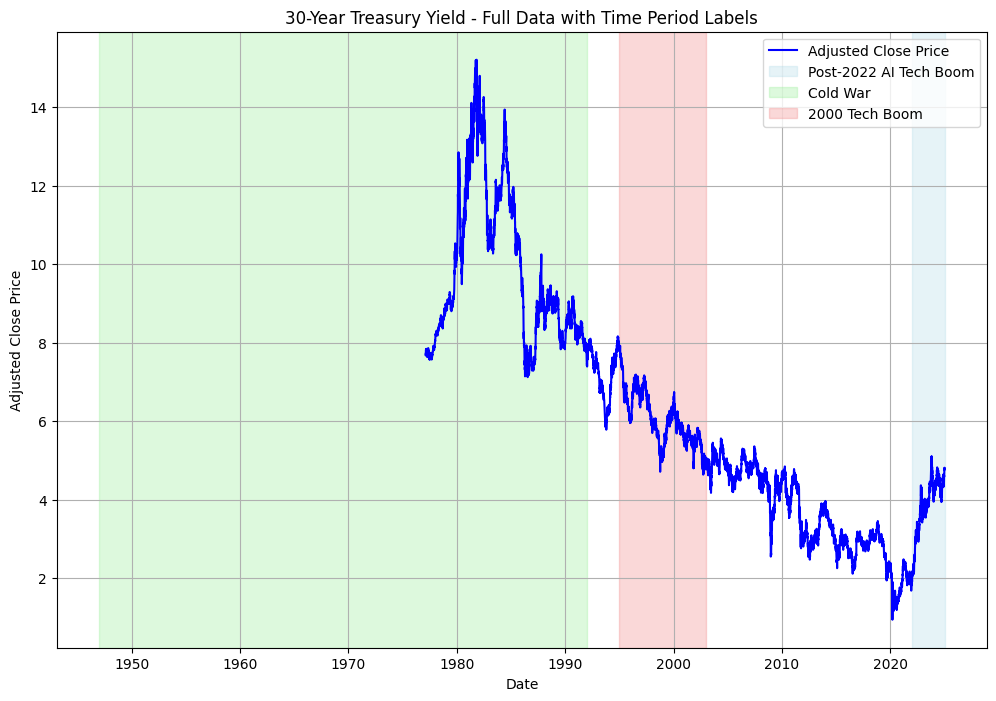

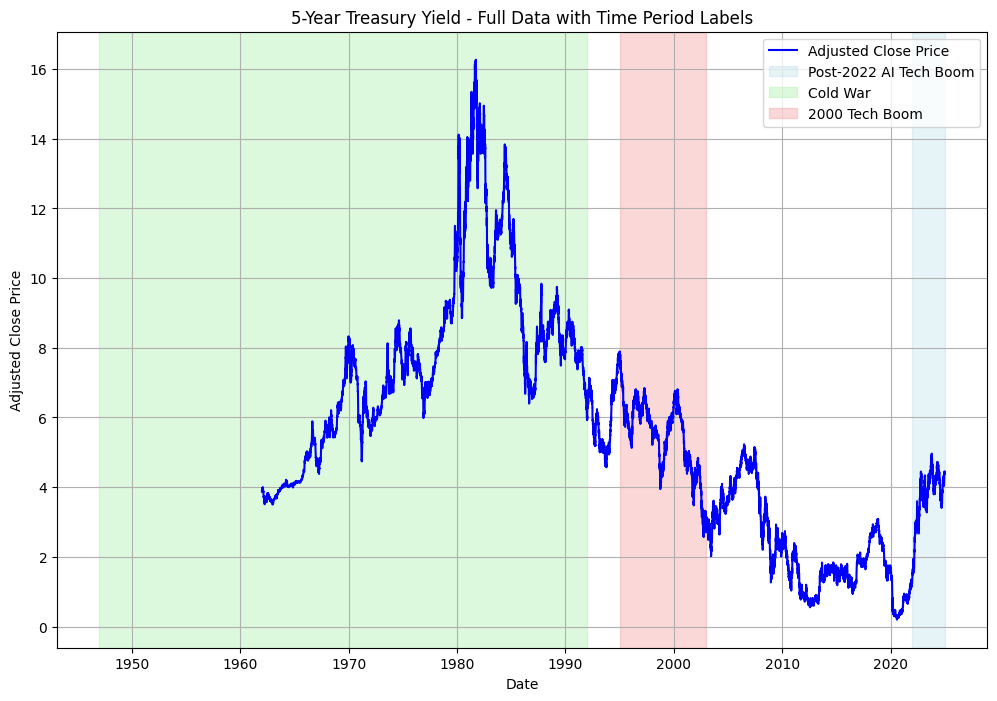

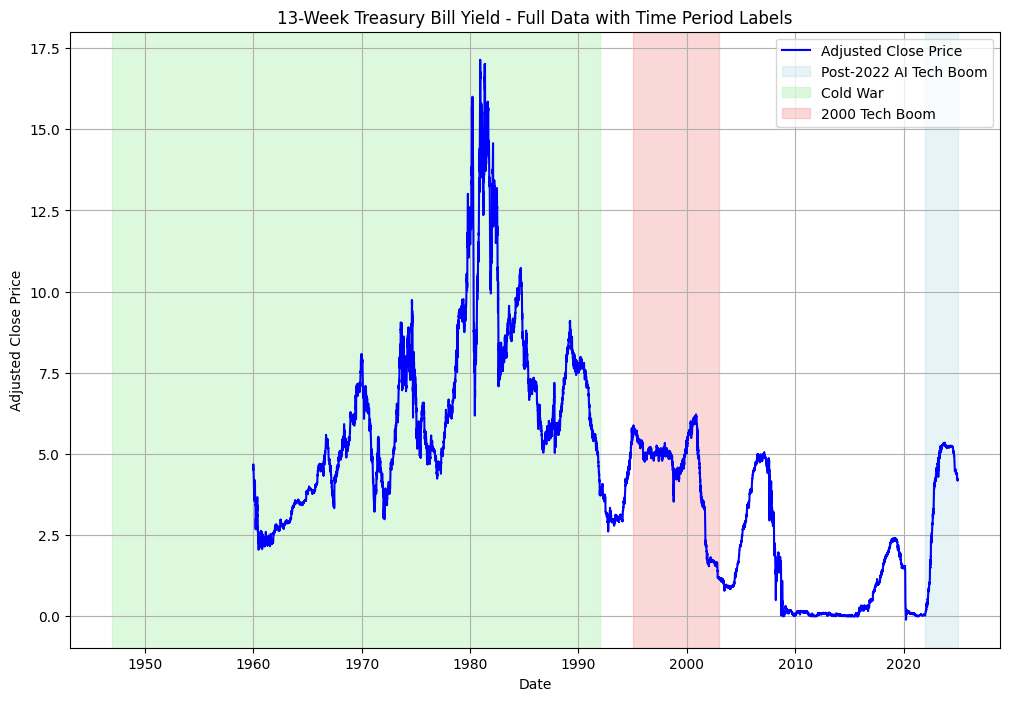

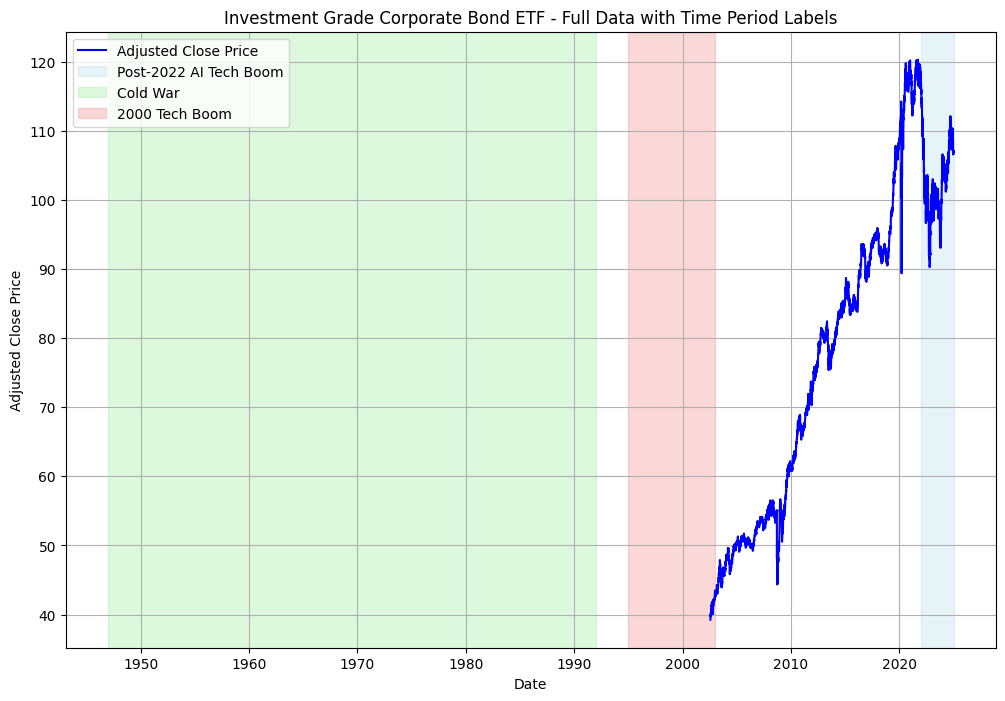

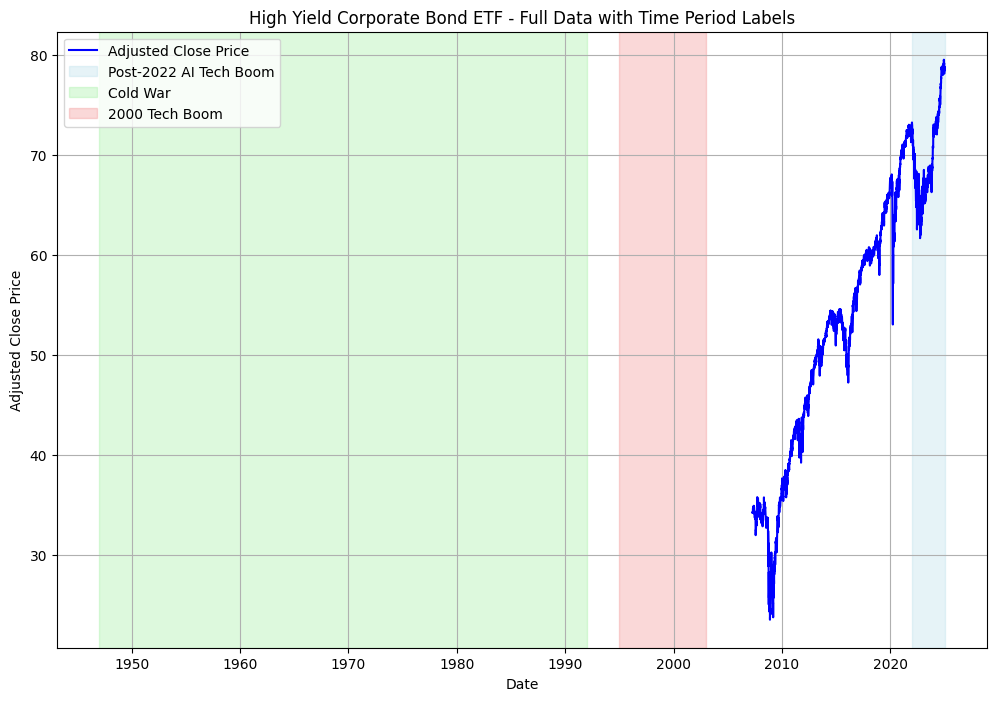

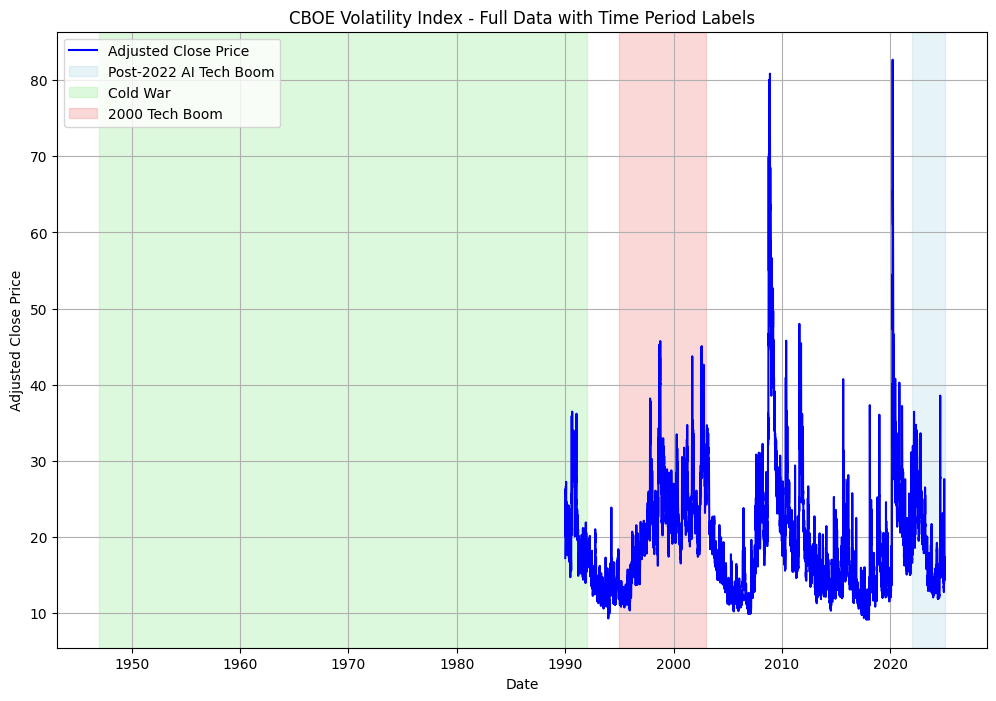

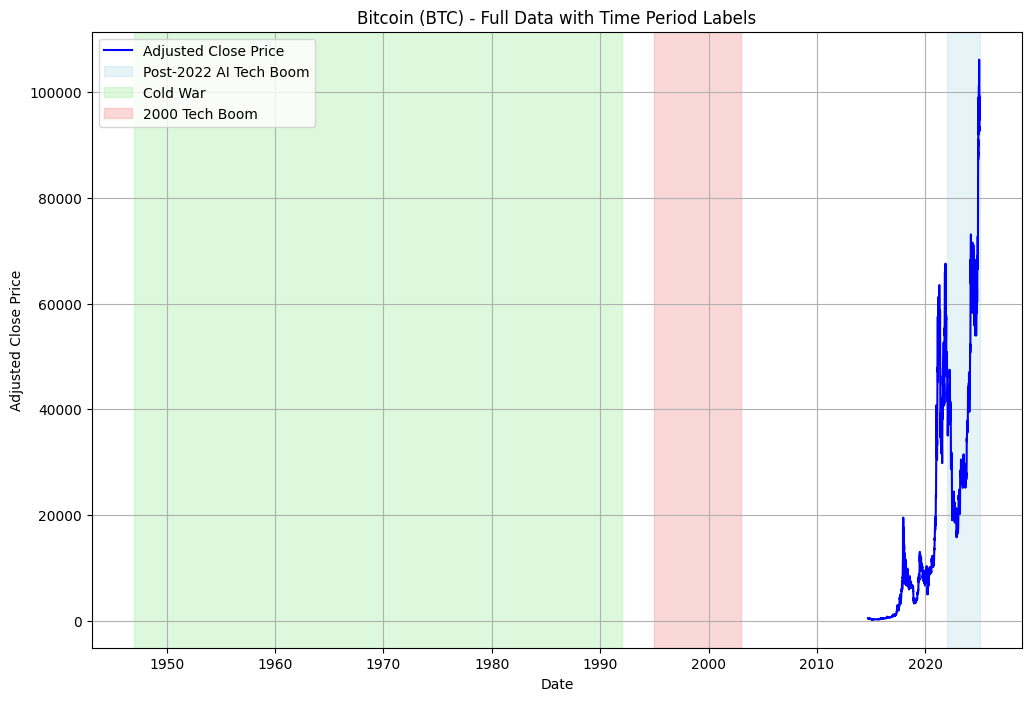

In [7]:
# Define time periods and their corresponding colors
time_periods = {
    "Post-2022 AI Tech Boom": ("2022-01-01", "2025-01-01"),
    "Cold War": ("1947-01-01", "1991-12-31"),
    "2000 Tech Boom": ("1995-01-01", "2002-12-31")
}
time_period_colors = {
    "Post-2022 AI Tech Boom": "lightblue",
    "Cold War": "lightgreen",
    "2000 Tech Boom": "lightcoral"
}

# Function to plot all data for a ticker with time periods labeled and differentiated by color
def plot_ticker_with_time_period_labels(ticker_data, time_periods, ticker_names):
    for ticker, data in ticker_data.items():
        # Reset index and ensure date is properly formatted
        if isinstance(data.index, pd.MultiIndex):
            data = data.reset_index()
        if 'date' in data.columns:
            data['date'] = pd.to_datetime(data['date'], utc=True)  # Ensure timezone-aware datetime
            data.set_index('date', inplace=True)

        plt.figure(figsize=(12, 8))
        # Plot all data for the ticker
        plt.plot(data.index, data['adjclose'], label="Adjusted Close Price", color='blue')

        # Add shaded regions for each time period with different colors
        for period_name, (start_date, end_date) in time_periods.items():
            plt.axvspan(pd.Timestamp(start_date, tz='UTC'), pd.Timestamp(end_date, tz='UTC'),
                        alpha=0.3, color=time_period_colors[period_name], label=period_name)

        # Use the actual name of the ticker in the title
        plt.title(f"{ticker_names[ticker]} - Full Data with Time Period Labels")
        plt.xlabel("Date")
        plt.ylabel("Adjusted Close Price")
        plt.legend(loc="best")
        plt.grid()
        plt.show()

# Example usage with your yahoo_data dictionary and yahoo_tickers mapping
plot_ticker_with_time_period_labels(yahoo_data, time_periods, yahoo_tickers)


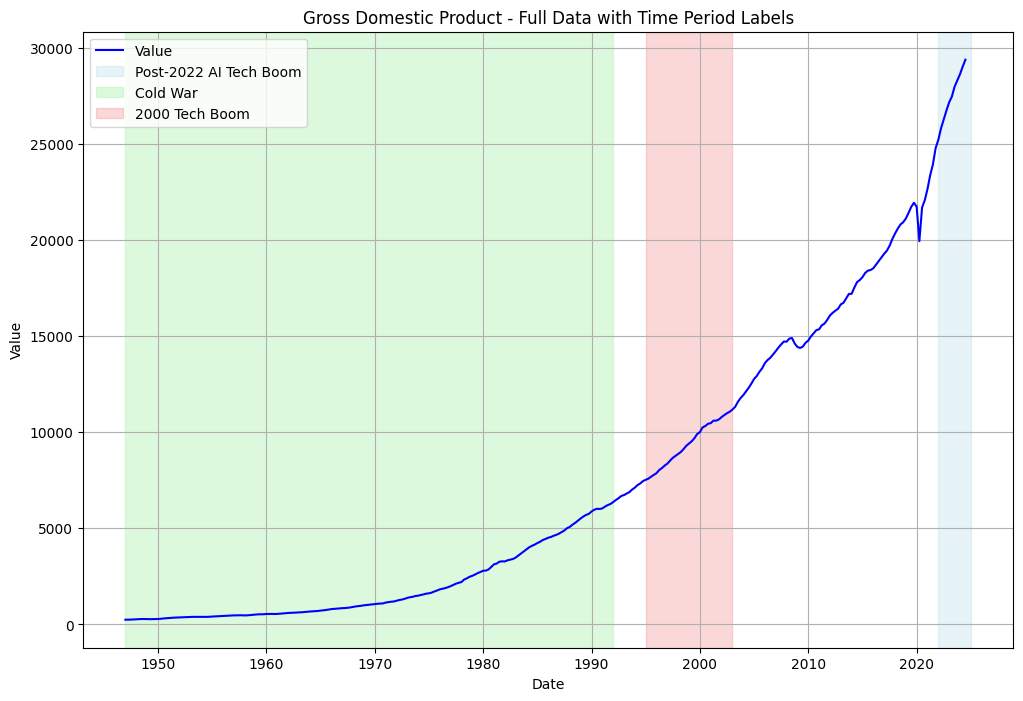

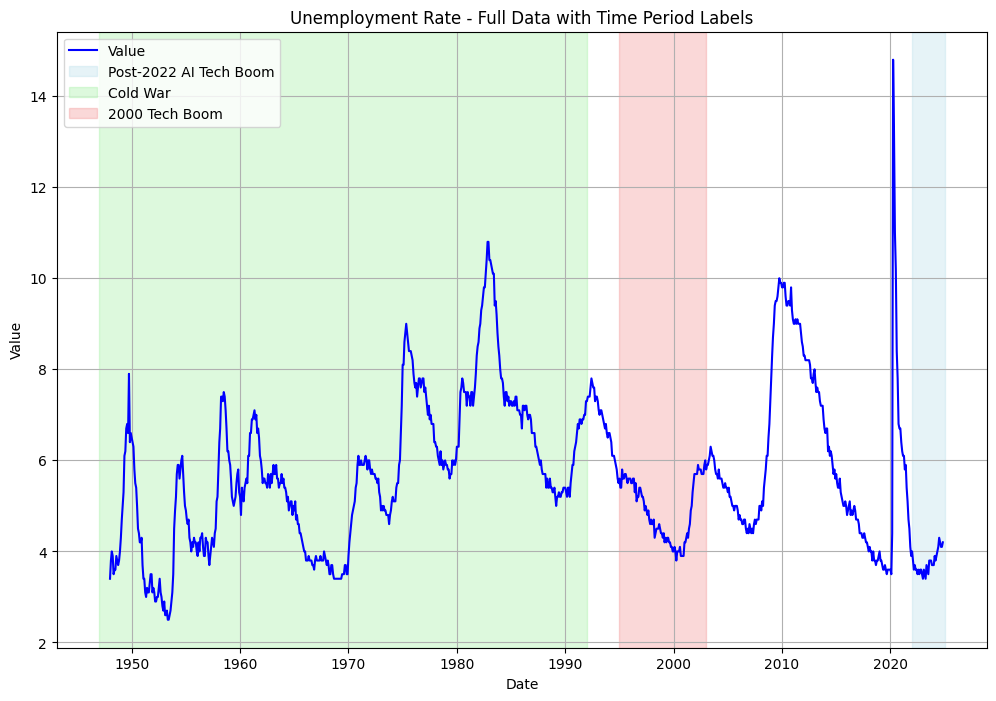

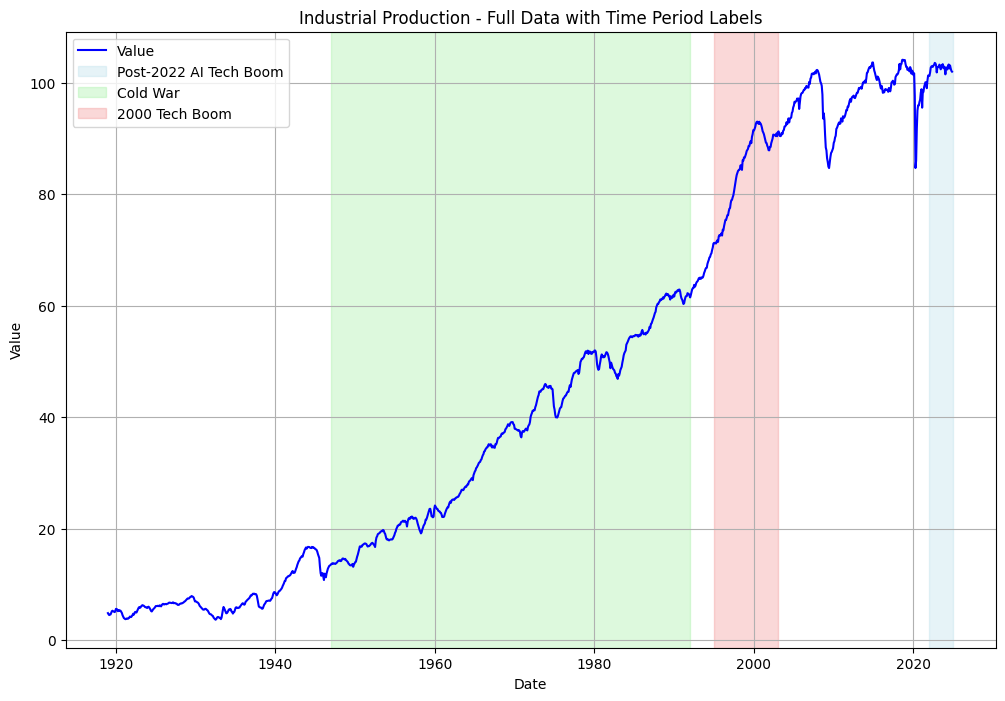

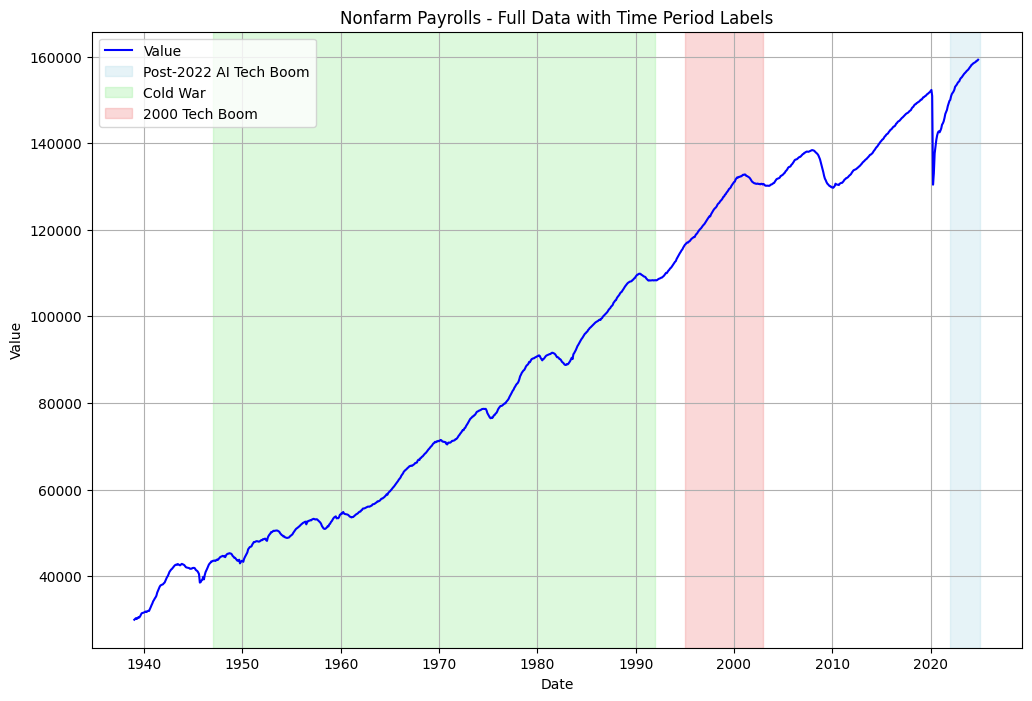

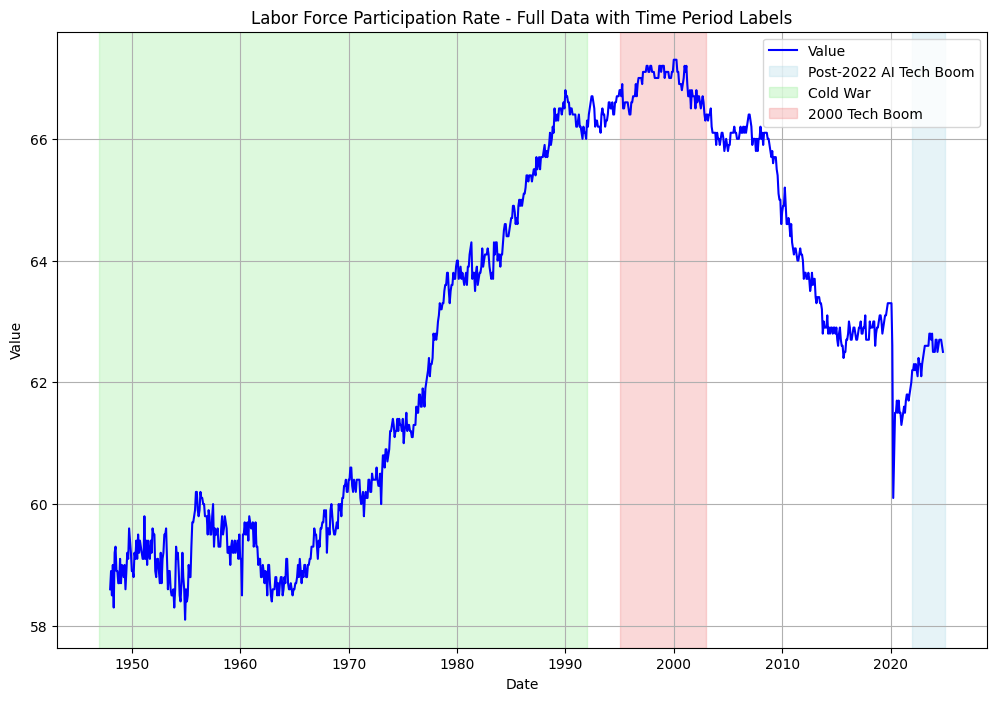

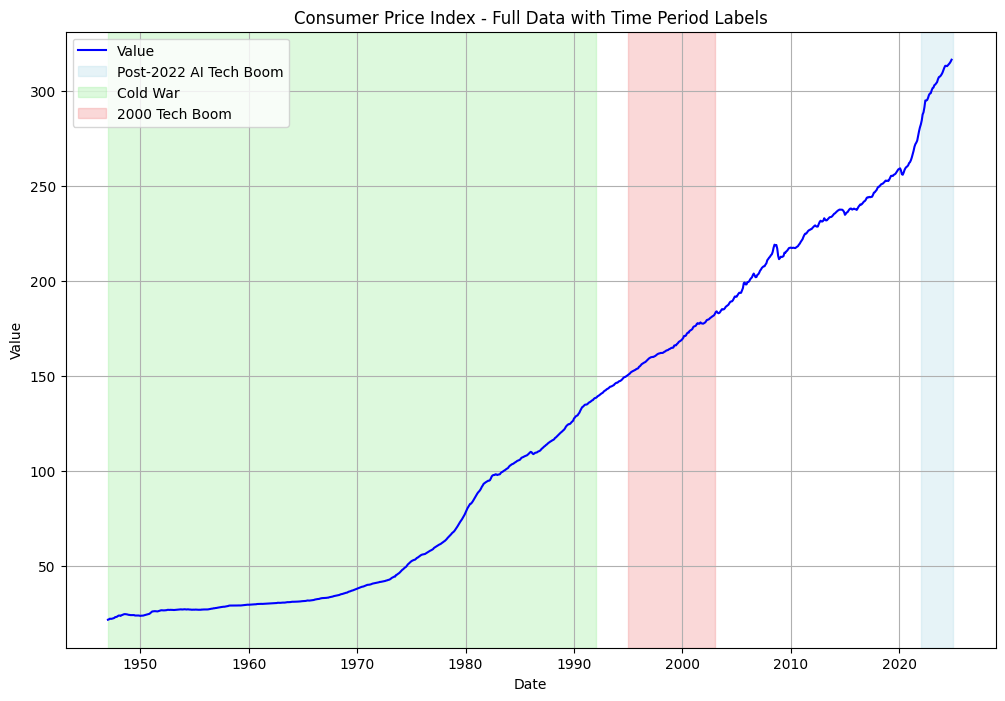

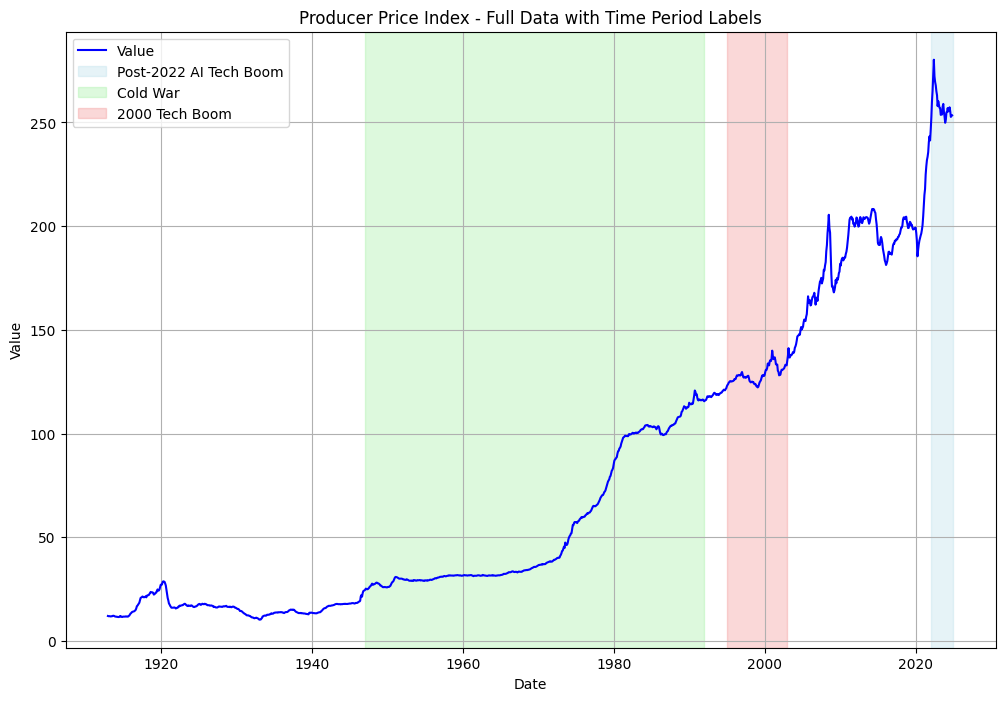

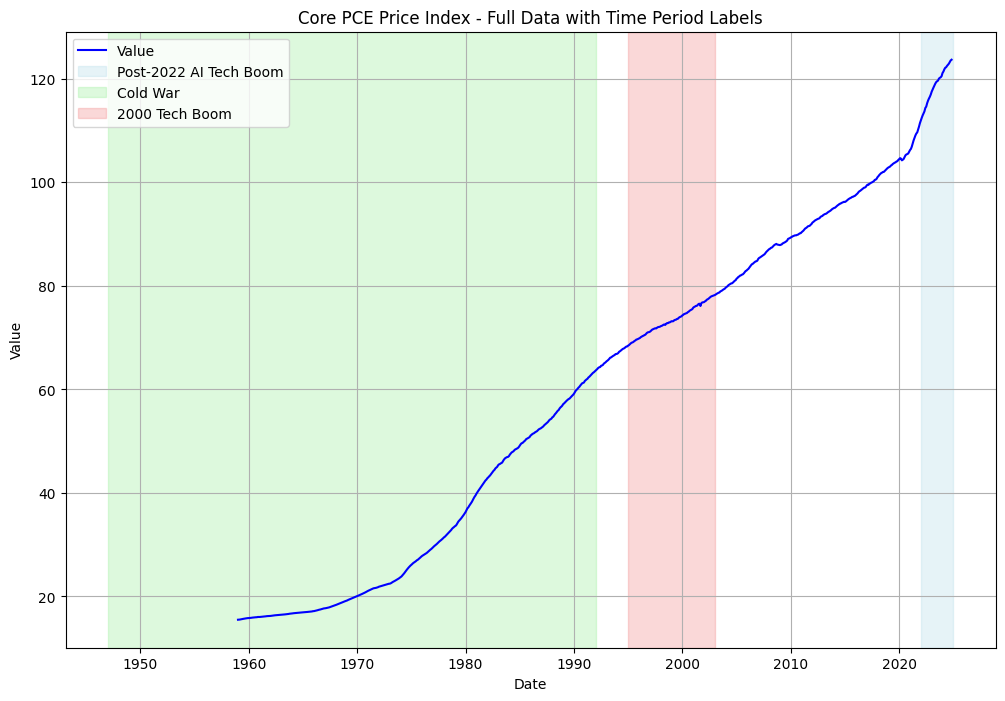

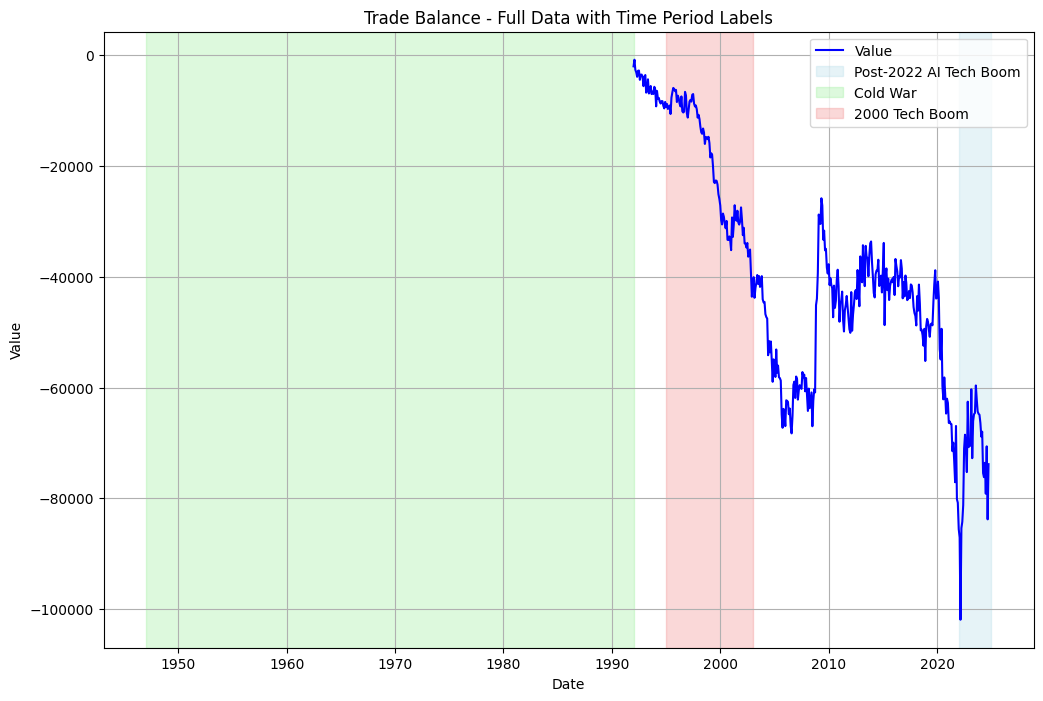

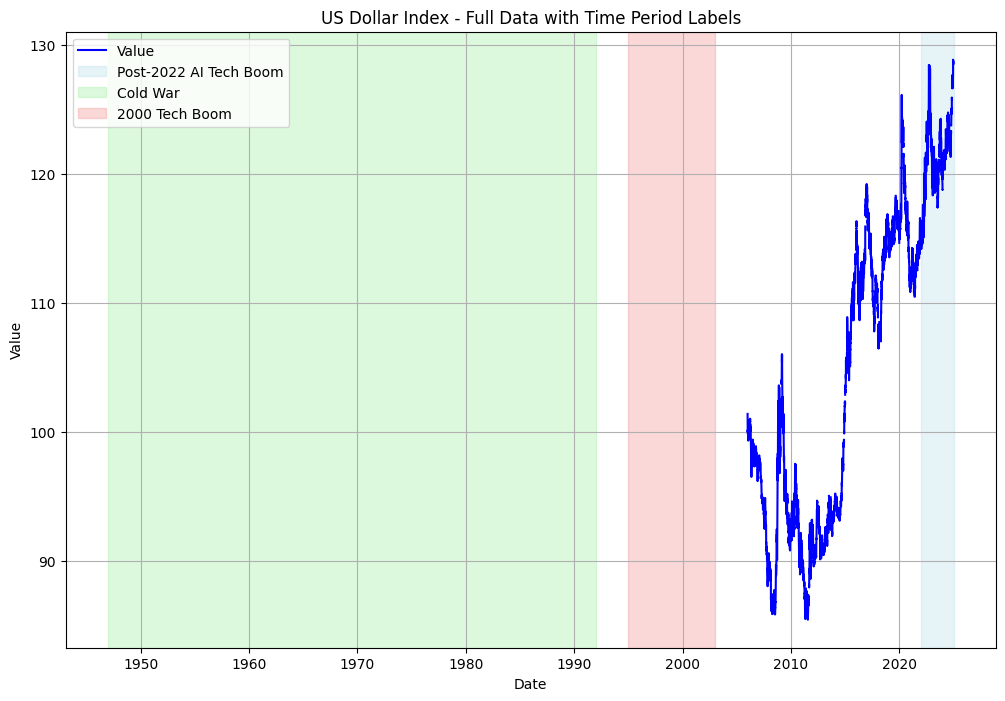

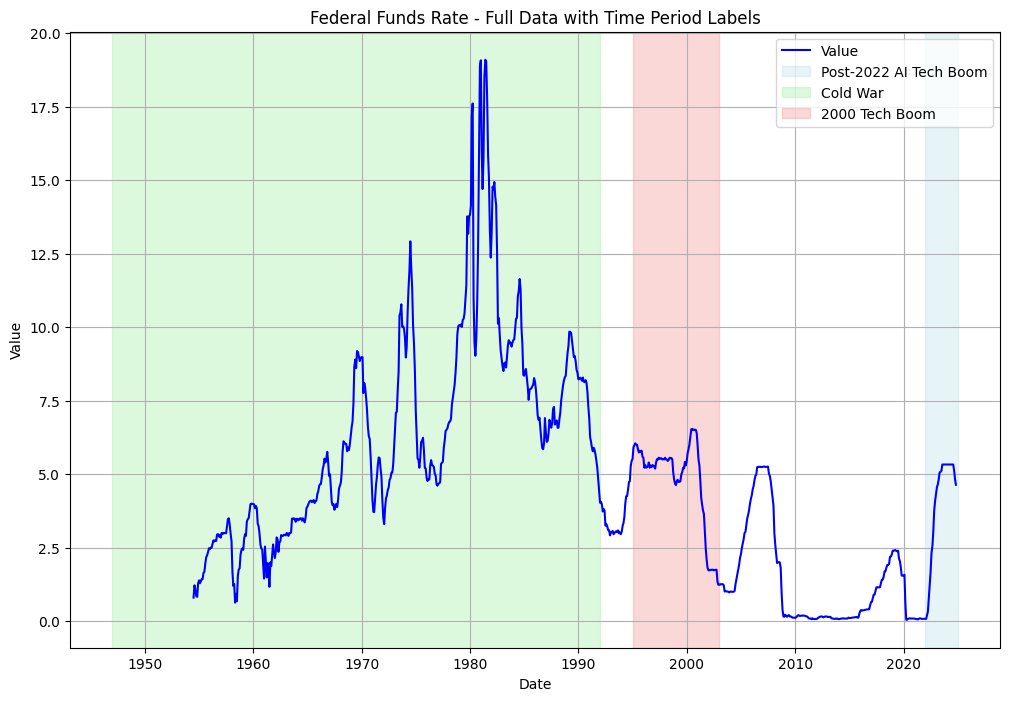

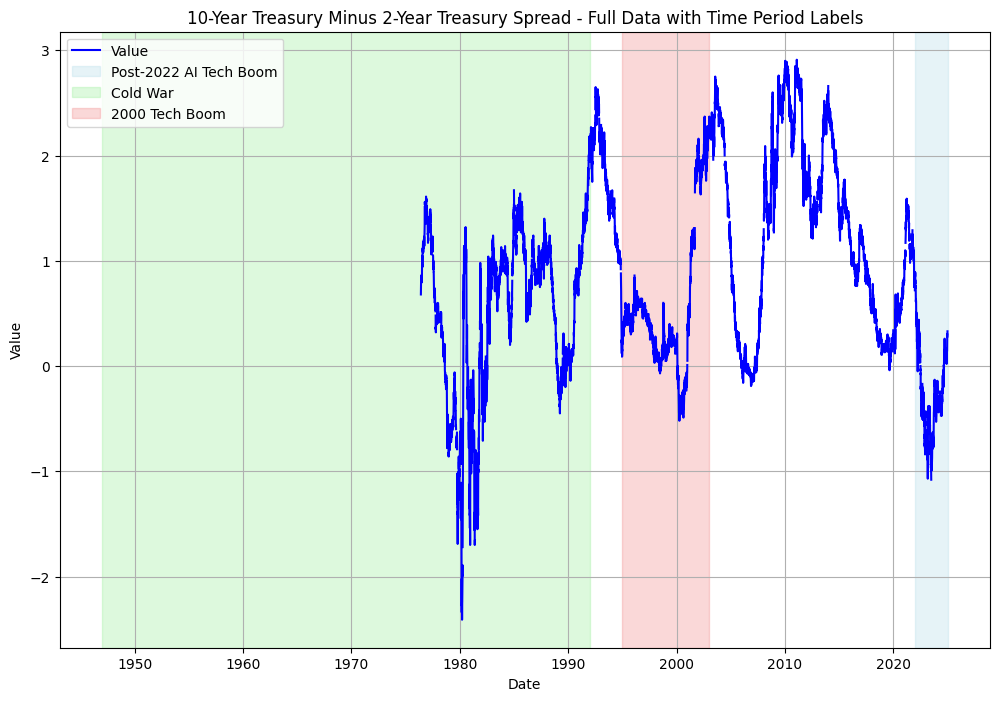

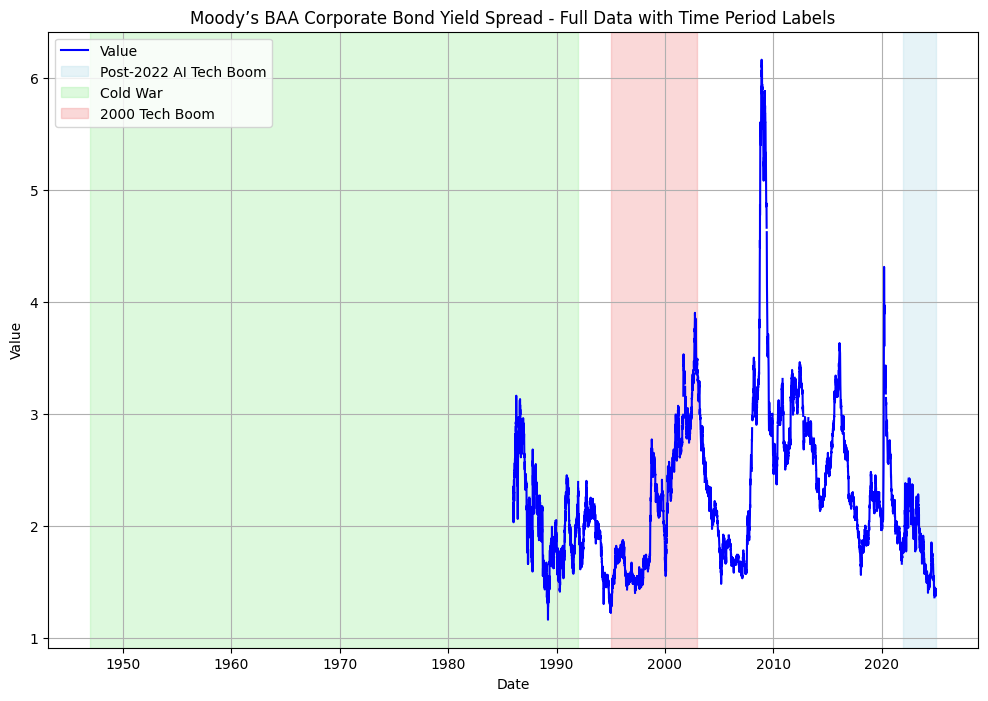

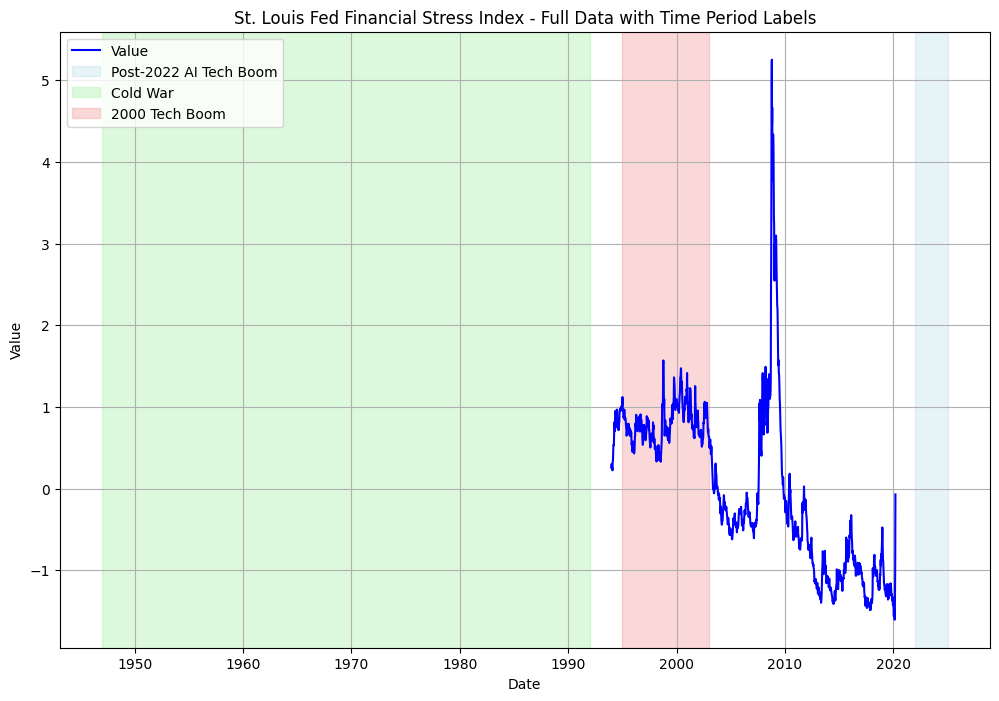

In [3]:
# Function to plot all data for a FRED series with time periods labeled and differentiated by color
def plot_fred_with_time_period_labels(fred_data, time_periods, fred_names):
    for series_id, data in fred_data.items():
        # Reset index and ensure date is properly formatted
        if isinstance(data.index, pd.MultiIndex):
            data = data.reset_index()
        if 'date' in data.columns:
            data['date'] = pd.to_datetime(data['date'], utc=True)  # Ensure timezone-aware datetime
            data.set_index('date', inplace=True)

        plt.figure(figsize=(12, 8))
        # Plot all data for the FRED series
        plt.plot(data.index, data['Value'], label="Value", color='blue')

        # Add shaded regions for each time period with different colors
        for period_name, (start_date, end_date) in time_periods.items():
            plt.axvspan(pd.Timestamp(start_date, tz='UTC'), pd.Timestamp(end_date, tz='UTC'),
                        alpha=0.3, color=time_period_colors[period_name], label=period_name)

        # Use the actual name of the FRED series in the title
        plt.title(f"{fred_names[series_id]} - Full Data with Time Period Labels")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend(loc="best")
        plt.grid()
        plt.show()

# Example usage with your fred_data dictionary and fred_series mapping
plot_fred_with_time_period_labels(fred_data, time_periods, fred_series)


ValueError: Cannot mix tz-aware with tz-naive values

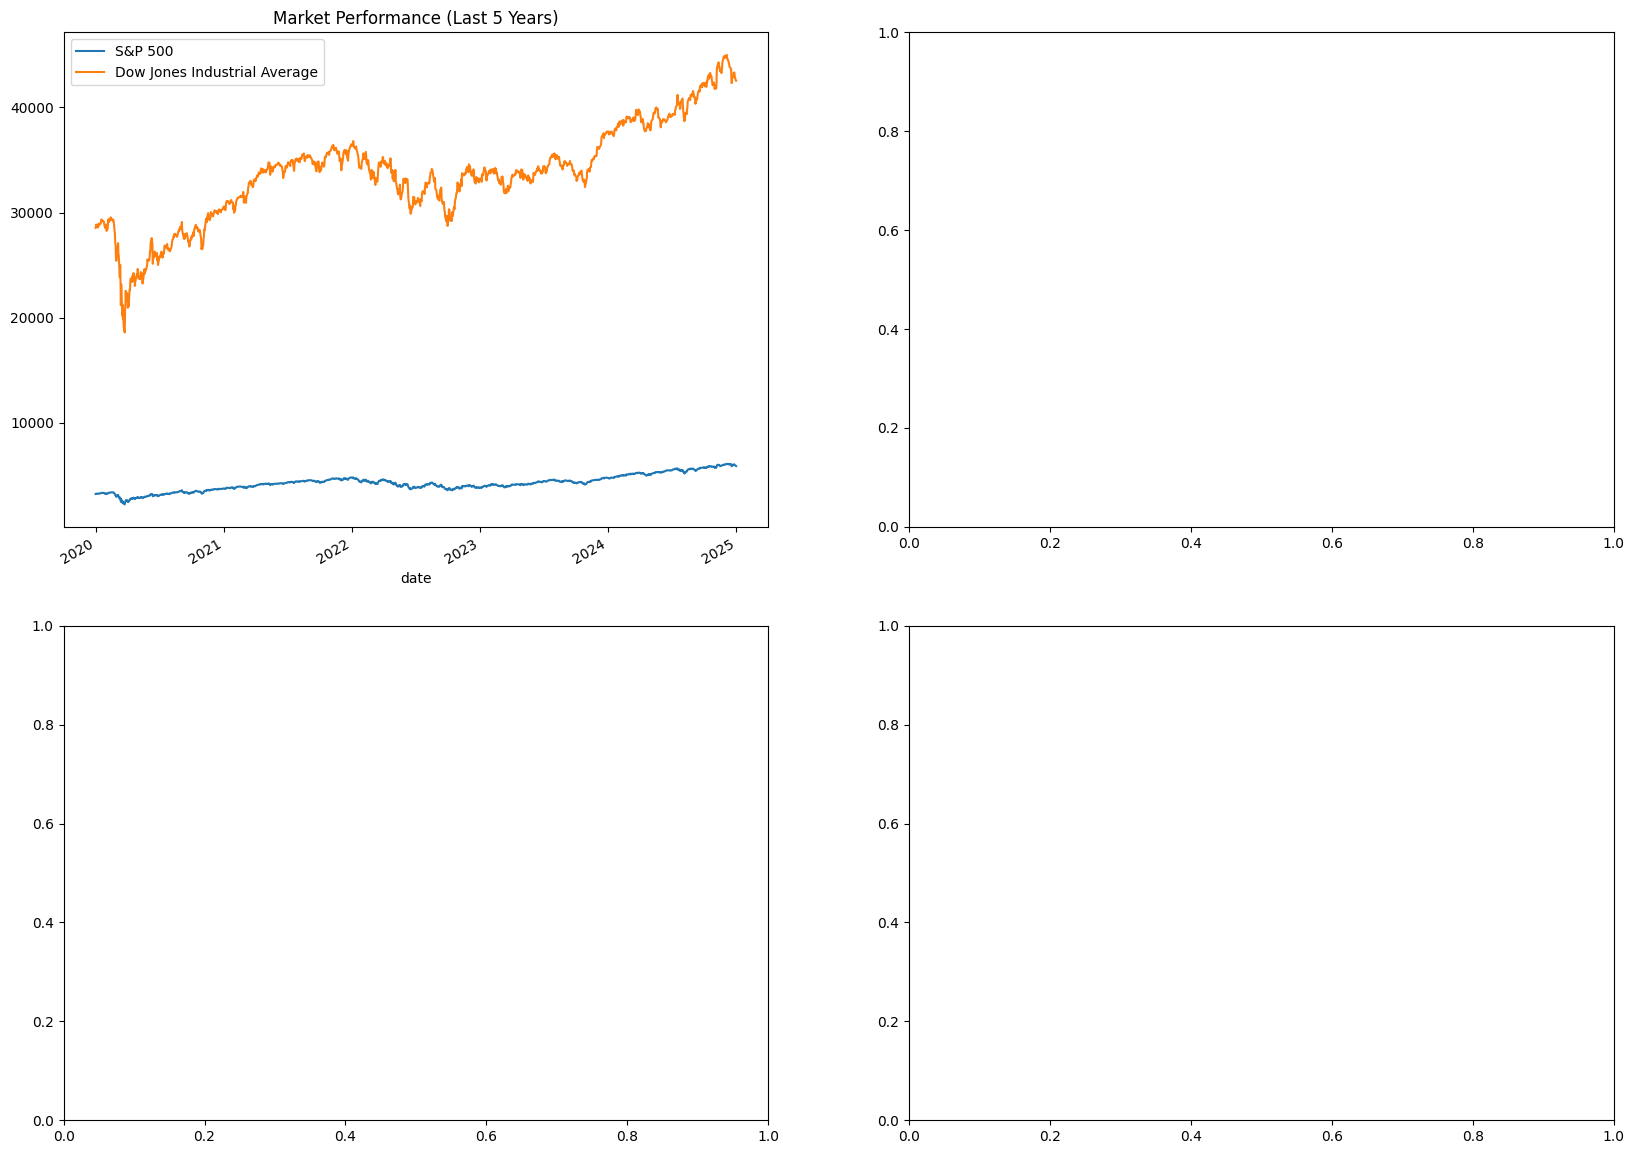

In [4]:
import numpy as np
from scipy import stats
import seaborn as sns

def prepare_data(data):
    data = data.reset_index()
    # Convert date to datetime
    data['date'] = pd.to_datetime(data['date'])
    
    # Standardize timezones: convert all to UTC
    if data['date'].dt.tz is not None:
        data['date'] = data['date'].dt.tz_convert('UTC')  # Convert tz-aware to UTC
    else:
        data['date'] = data['date'].dt.tz_localize('UTC')  # Localize tz-naive to UTC
    
    # Set date as the index
    data.set_index('date', inplace=True)
    return data


def filter_recent_data(data, years=5):
    """Filter data to recent years"""
    end_date = data.index.max()
    start_date = end_date - pd.DateOffset(years=years)
    return data[start_date:end_date]

def analyze_war_impacts(yahoo_data, fred_data, war_events):
    """Analyze market behavior around major war events"""
    results = {}
    
    # Key assets to monitor during conflicts
    war_sensitive_assets = {
        '^GSPC': 'S&P 500',
        'GC=F': 'Gold',
        'CL=F': 'Oil',
        '^VIX': 'VIX',
        'BTC-USD': 'Bitcoin'
    }
    
    for event, date in war_events.items():
        event_ts = pd.Timestamp(date)
        window_start = event_ts - pd.Timedelta(days=30)
        window_end = event_ts + pd.Timedelta(days=30)
        
        event_impact = {}
        for ticker in war_sensitive_assets.keys():
            if ticker in yahoo_data:
                try:
                    data = prepare_data(yahoo_data[ticker])
                    
                    # Get data for the window
                    window_data = data.loc[window_start:window_end]
                    
                    if not window_data.empty:
                        # Split data into pre and post event
                        pre_event_data = window_data.loc[:event_ts]
                        post_event_data = window_data.loc[event_ts:]
                        
                        # Calculate returns
                        pre_event = pre_event_data['adjclose'].pct_change().mean()
                        post_event = post_event_data['adjclose'].pct_change().mean()
                        
                        event_impact[ticker] = {
                            'pre_event_return': pre_event * 100,
                            'post_event_return': post_event * 100,
                            'impact': (post_event - pre_event) * 100
                        }
                except Exception as e:
                    print(f"Error analyzing {ticker} for {event}: {e}")
        
        results[event] = event_impact
    
    return results

def plot_analysis(yahoo_data, fred_data, war_events, time_periods):
    """Create comprehensive analysis plots"""
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # Plot 1: Market Performance
    ax = axes[0, 0]
    for ticker in ['^GSPC', '^DJI']:
        if ticker in yahoo_data:
            data = prepare_data(yahoo_data[ticker])
            recent_data = filter_recent_data(data, years=5)
            recent_data['adjclose'].plot(ax=ax, label=yahoo_tickers[ticker])
    ax.set_title('Market Performance (Last 5 Years)')
    ax.legend()
    
    # Plot 2: Safe Haven Assets During Conflicts
    ax = axes[0, 1]
    for ticker in ['GC=F', 'BTC-USD']:
        if ticker in yahoo_data:
            data = prepare_data(yahoo_data[ticker])
            recent_data = filter_recent_data(data, years=5)
            recent_data['adjclose'].plot(ax=ax, label=yahoo_tickers[ticker])
    ax.set_title('Safe Haven Assets (Last 5 Years)')
    ax.legend()
    
    # Plot 3: War Impact Analysis
    ax = axes[1, 0]
    war_impact = analyze_war_impacts(yahoo_data, fred_data, war_events)
    
    # Prepare data for plotting
    impact_data = []
    for event, impacts in war_impact.items():
        for ticker, metrics in impacts.items():
            impact_data.append({
                'Event': event,
                'Asset': yahoo_tickers.get(ticker, ticker),
                'Impact': metrics['impact']
            })
    
    if impact_data:
        impact_df = pd.DataFrame(impact_data)
        if not impact_df.empty:
            impact_pivot = impact_df.pivot(index='Event', columns='Asset', values='Impact')
            impact_pivot.plot(kind='bar', ax=ax)
            ax.set_title('Market Impact of War Events')
            plt.xticks(rotation=45)
    
    # Plot 4: VIX During War Events
    ax = axes[1, 1]
    if '^VIX' in yahoo_data:
        vix_data = prepare_data(yahoo_data['^VIX'])
        recent_vix = filter_recent_data(vix_data, years=3)
        recent_vix['adjclose'].plot(ax=ax, label='VIX')
        
        # Add vertical lines for war events
        for event, date in war_events.items():
            event_ts = pd.Timestamp(date)
            if event_ts in recent_vix.index:
                ax.axvline(x=event_ts, color='r', linestyle='--', alpha=0.5, label=event)
        
        ax.set_title('Market Volatility (VIX) - Last 3 Years')
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return war_impact

# Define war events
war_events = {
    'Ukraine_Invasion': '2022-02-24',
    'Hamas_Israel': '2023-10-07',
    'Iran_Israel': '2024-04-13'
}

# Run analysis
war_impact = plot_analysis(yahoo_data, fred_data, war_events, time_periods)

# Print summary of war impacts
print("\nWar Impact Analysis Summary:")
for event, impacts in war_impact.items():
    print(f"\n{event}:")
    for asset, metrics in impacts.items():
        print(f"{yahoo_tickers[asset]}: {metrics['impact']:.2f}% change")